# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator,DataGenerator 
from sklearn.metrics import silhouette_score
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier  
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture
from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import MiniBatchKMeans
from kneed import KneeLocator
from sklearn.cluster import AffinityPropagation
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.simplefilter("ignore")
plt.style.use('seaborn')

D:\anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
# Making data frame from csv file
data = pd.read_csv('Customer_Data.csv')
df = pd.DataFrame(data)
df

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
# display row and columns of dataset
print("Number of Rows: ",df.shape[0],", Number of Columns: ",df.shape[1])

Number of Rows:  8950 , Number of Columns:  18


## Pre-processing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
df.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

### Searching for missing values

In [6]:
df.isnull().sum()
print('----------------------------------------\n Percentage of missing data: \n')
print((df[['MINIMUM_PAYMENTS', 'CREDIT_LIMIT']].isnull().sum()/df['CUST_ID'].count())*100) 

----------------------------------------
 Percentage of missing data: 

MINIMUM_PAYMENTS    3.497207
CREDIT_LIMIT        0.011173
dtype: float64


In [7]:
# Finding unique values in columns to determine if there is any missing values including (-,?...)
df.loc[df.index.isin(['?','-'])].value_counts()

Series([], dtype: int64)

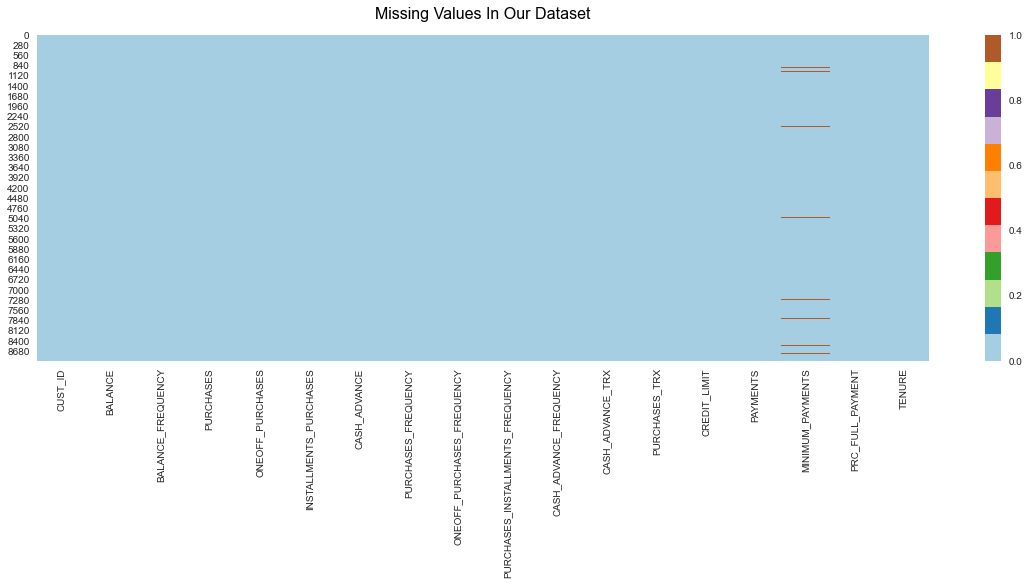

In [8]:
plt.figure(figsize = (20,6))
sns.heatmap(df.isnull(), cmap="Paired", fmt='d')
plt.title('Missing Values In Our Dataset',fontsize=16, color = 'black', y=1.03)
plt.show()

#### Customer ID seems to be an unique id for each customer and hence won't play any role in determining the cluster, so we drop it.

In [9]:
df.drop('CUST_ID',axis=1 ,inplace=True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365          0.500000       6  
8946   275.861322               NaN          0.000000       6  
8947    81

### Searching for duplicate values

In [10]:
 print(f"Number of dublicated: {df.duplicated().sum()}")
print(f"number of rows: {df.shape}")
print(f"number of duplicate rows: {df[df.duplicated()].shape}")

Number of dublicated: 0
number of rows: (8950, 17)
number of duplicate rows: (0, 17)


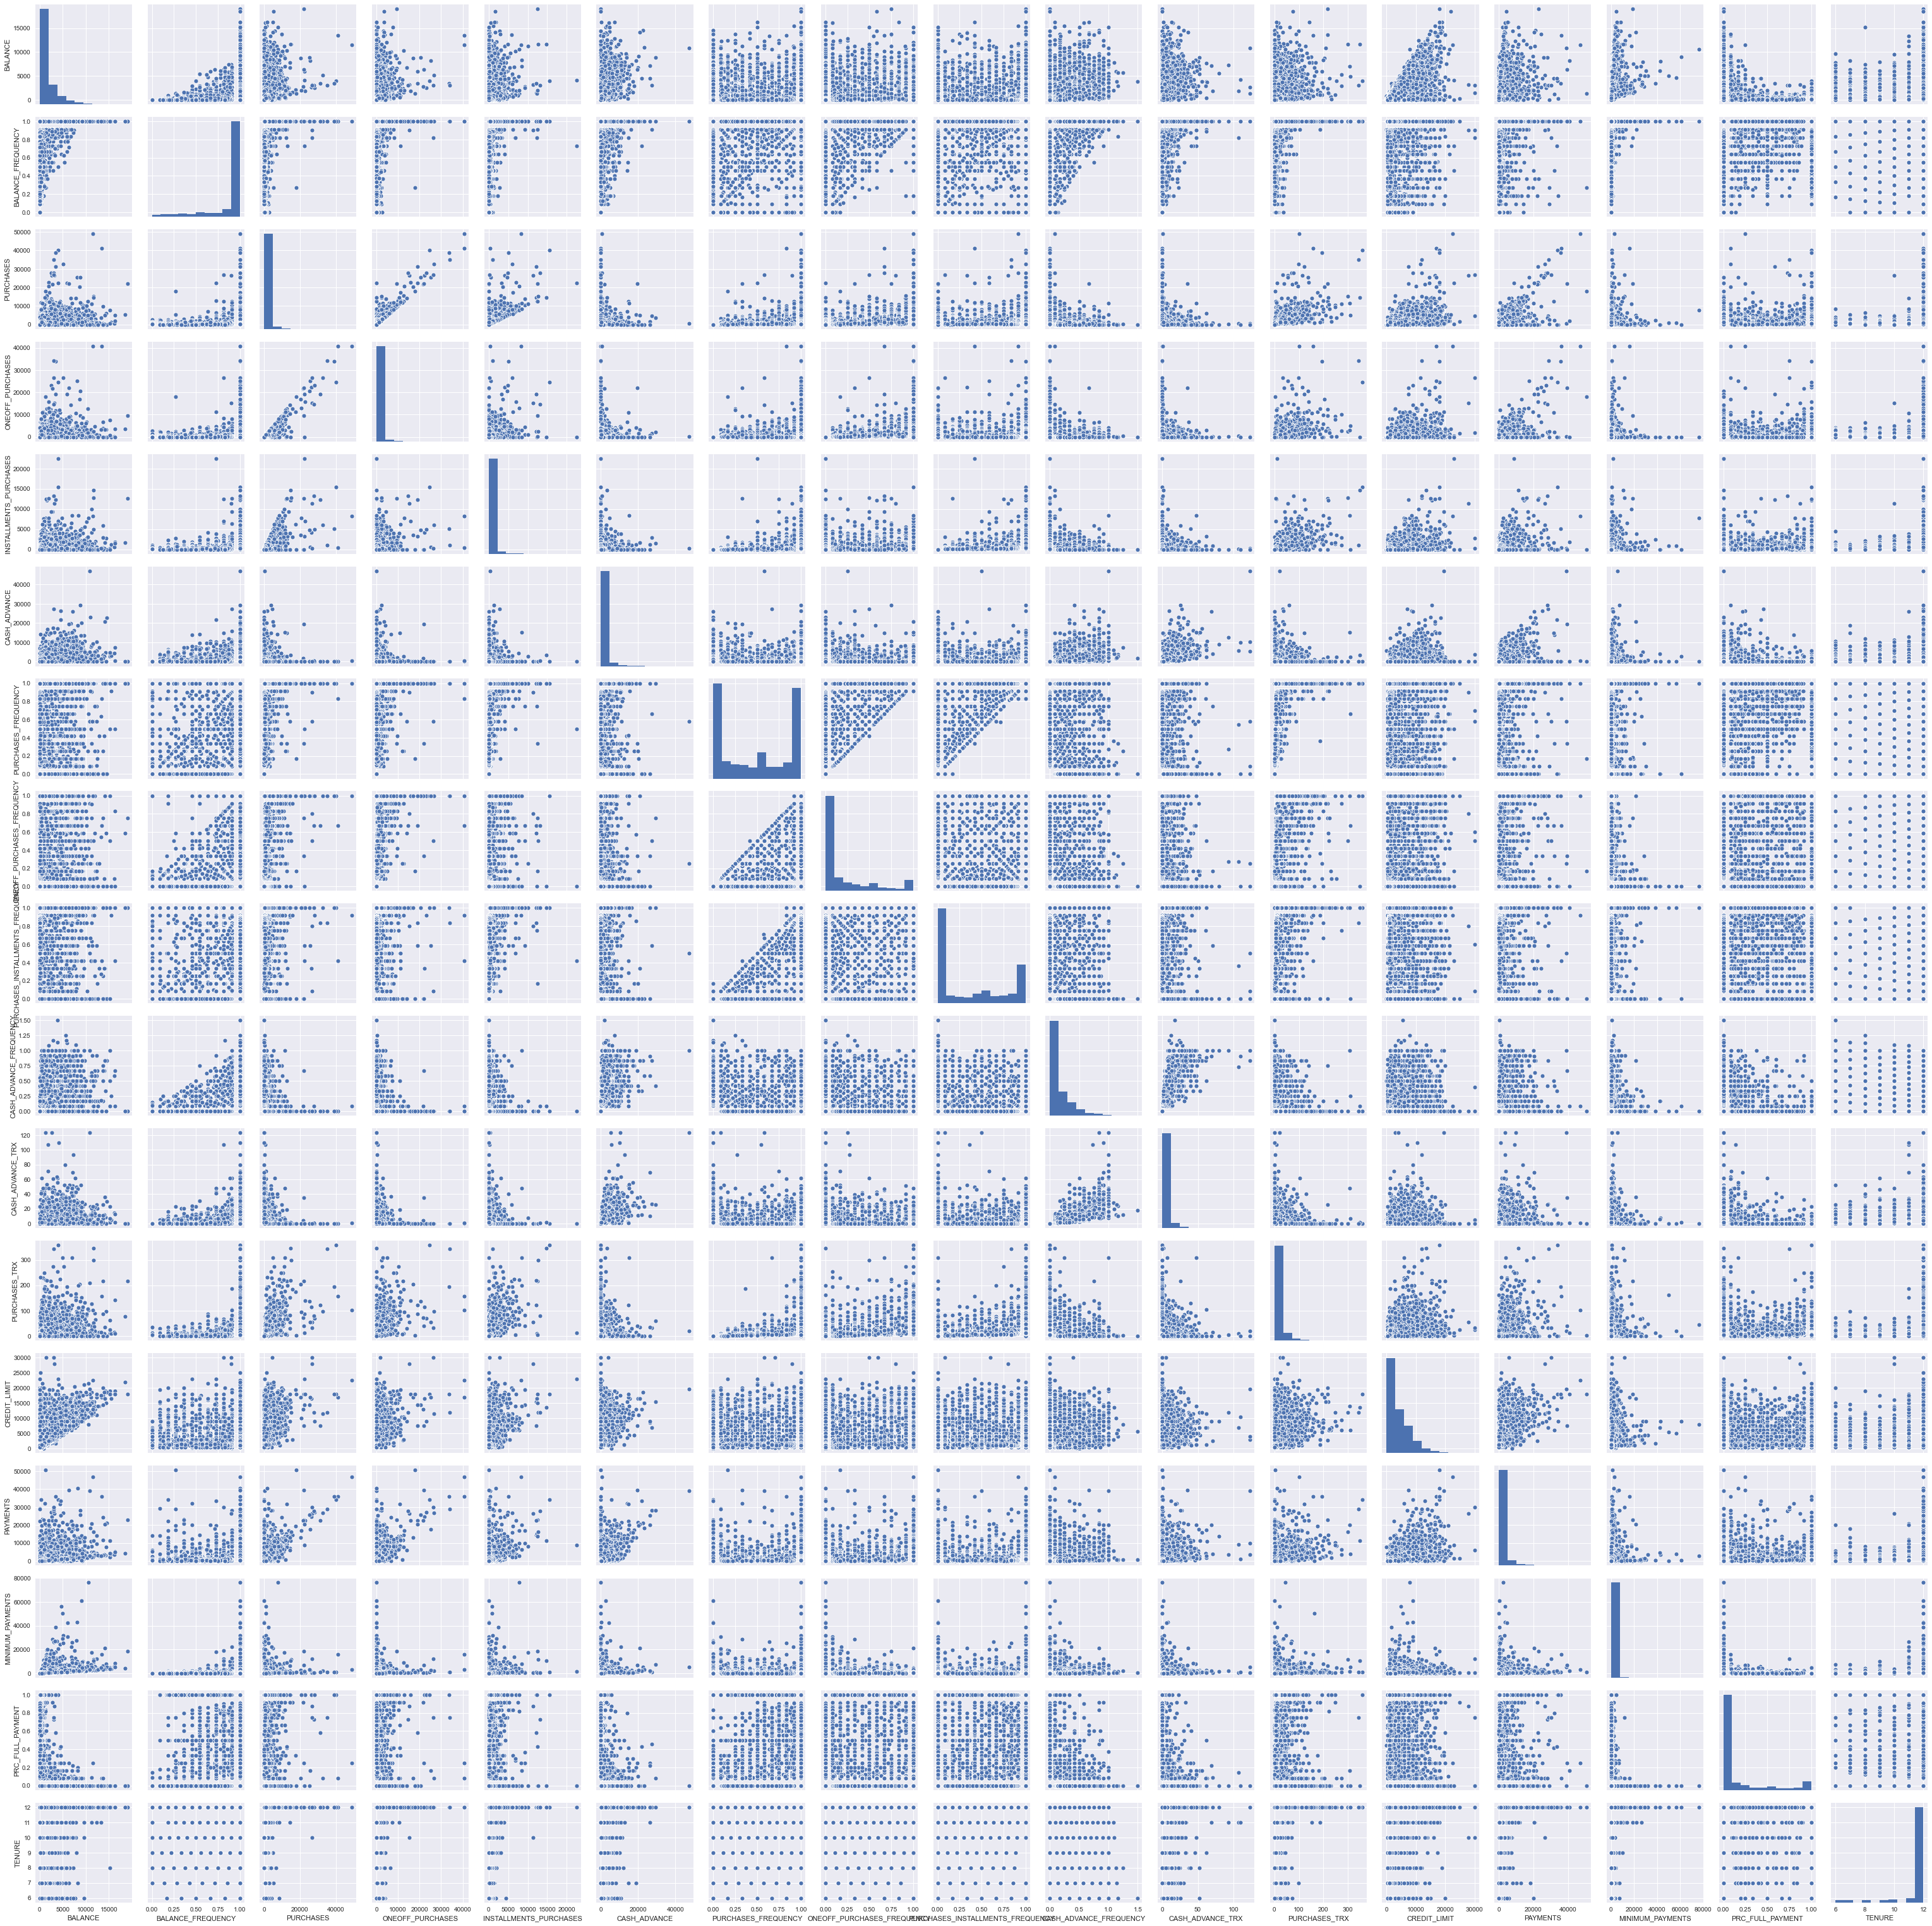

In [11]:
# Bivariate Analysis
sns.pairplot(df)

### We see from the plots:

    - As the credit limit increase, the balance also increases hence a linear relationship.
    - As the number of purchases increases, the number of "cash in advance" transactions decreases.
    - As the credit balance is low, the purchases, one-off purchases, and installment purchases are less.
    - As the credit balance is low, the "cash in advance" transactions are less.
    - Purchases, one-off purchases, and installment purchases are all related linearly.


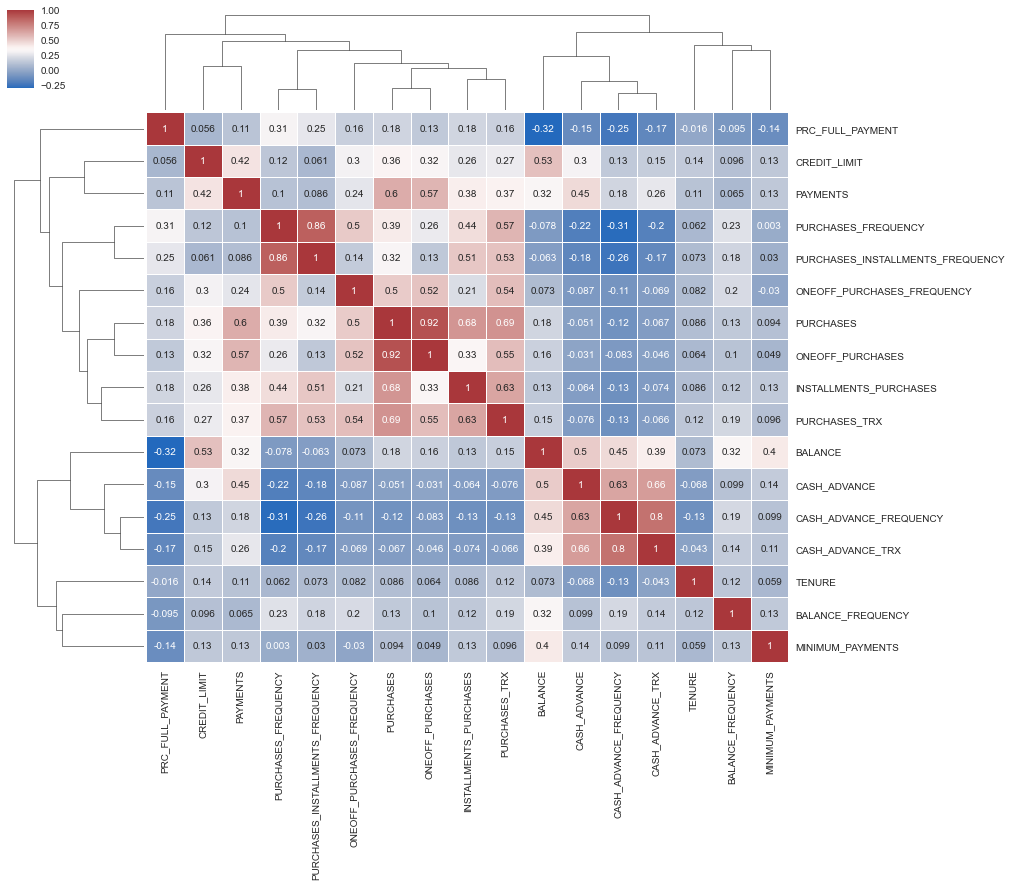

In [12]:
# Correlation
sns.clustermap(df.corr(), cmap = "vlag", annot = True, linewidths = .8, figsize = (14,12))
plt.show()

## We see from the heatmap:

> We've got some pair of features with high correlation that might not be a good thing for modeling: 

    ONEOFF_PURCHASES and PURCHASES have the highest correlation (92%) between other features.
    PURCHASE_FREQUENCY and PURCHASES_INSTALLMENTS_FREQUENCY also have a high correlation (86%).
    CASH_ADVANCE_FREQUENCY and CASH_ADVANCE_TRX also have a high correlation (63%).
    People do not make full payments when the balance is high.
    Purchase frequency and cash advance frequency are inversely correlated. That is as the purchase frequency is high, the number of times cash is paid in advance is less and vice-versa.
    Inspecting all the plots above, a good feature to be used as the key feature for plotting and comparison purporses, is BALANCE. Reasons for this choice is that this feature is not discrete. Also, based on the distplot, values of this feature are more varied in comparison with other continuous features. In addition, this column is correlated with others to a good extent.



In [13]:
# display the amount of deviation from the normal distribution of data in each column
df.skew()

BALANCE                              2.393386
BALANCE_FREQUENCY                   -2.023266
PURCHASES                            8.144269
ONEOFF_PURCHASES                    10.045083
INSTALLMENTS_PURCHASES               7.299120
CASH_ADVANCE                         5.166609
PURCHASES_FREQUENCY                  0.060164
ONEOFF_PURCHASES_FREQUENCY           1.535613
PURCHASES_INSTALLMENTS_FREQUENCY     0.509201
CASH_ADVANCE_FREQUENCY               1.828686
CASH_ADVANCE_TRX                     5.721298
PURCHASES_TRX                        4.630655
CREDIT_LIMIT                         1.522464
PAYMENTS                             5.907620
MINIMUM_PAYMENTS                    13.622797
PRC_FULL_PAYMENT                     1.942820
TENURE                              -2.943017
dtype: float64

#### There is a lot of skewness and they are varied. It is kind of expected from datasets like these as there will always be a few customers who do a very high amounts of transactions.

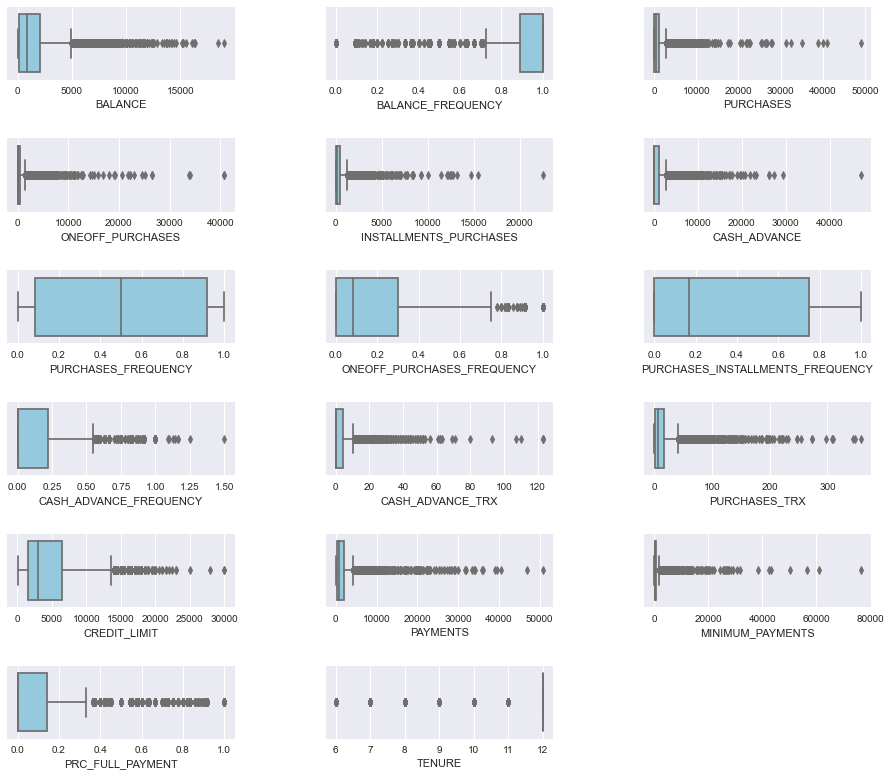

In [14]:
# Searching for outliers
plt.subplots(figsize=(15, 15))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

for i, column in enumerate(df.columns, 1):
    plt.subplot(7, 3, i)
    sns.boxplot(df[column], color='skyblue')

In [15]:
# Detecting outliers using the Inter Quantile Range(IQR)
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
# calc Lower bound and upper bound
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
# check if value bigger than upper bound, or smaller than Lower bound
No_Outliers = df[(df < LB) | (df > UB)].count()
print('Number of Outliers at each column:\n')
print('-'*50)
DF_outlier = pd.DataFrame(No_Outliers, columns=['(No. Outliers)'])
# To show whole rows
pd.set_option('display.max_rows', DF_outlier.shape[0]+1)
print(DF_outlier)

Number of Outliers at each column:

--------------------------------------------------
                                  (No. Outliers)
BALANCE                                      695
BALANCE_FREQUENCY                           1493
PURCHASES                                    808
ONEOFF_PURCHASES                            1013
INSTALLMENTS_PURCHASES                       867
CASH_ADVANCE                                1030
PURCHASES_FREQUENCY                            0
ONEOFF_PURCHASES_FREQUENCY                   782
PURCHASES_INSTALLMENTS_FREQUENCY               0
CASH_ADVANCE_FREQUENCY                       525
CASH_ADVANCE_TRX                             804
PURCHASES_TRX                                766
CREDIT_LIMIT                                 248
PAYMENTS                                     808
MINIMUM_PAYMENTS                             841
PRC_FULL_PAYMENT                            1474
TENURE                                      1366


In [16]:
# Dropping the outliers 
df = df[(df['CASH_ADVANCE']<40000)]
df = df[(df['INSTALLMENTS_PURCHASES']<20000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 8948


## Dealing with missing values

In [17]:
# missing values in 'CREDIT_LIMIT' column
Nulls_value = pd.isnull(df["CREDIT_LIMIT"])
df[Nulls_value]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5203  18.400472           0.166667        0.0               0.0   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5203                     0.0    186.853063                  0.0   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5203                         0.0                               0.0   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5203                0.166667                 1              0           NaN   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5203  9.040017         14.418723               0.0       6

In [18]:
df.drop([5203], axis=0, inplace=True)
df.reset_index( inplace = True)
df.drop('index',axis=1,inplace = True)
df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8942    28.493517           1.000000     291.12              0.00   
8943    19.183215           1.000000     300.00              0.00   
8944    23.398673           0.833333     144.40              0.00   
8945    13.457564           0.833333       0.00              0.00   
8946   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8942                  291.12      0.000000             1.000000   
8943                  300.00      0.000000             1.000000   
8944                  144.40      0.000000             0.833333   
8945                    0.00     36.558778             0.000000   
8946                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.833333   
8944                    0.000000                          0.666667   
8945                    0.000000                          0.000000   
8946                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8942                0.000000                 0              6        1000.0   
8943                0.000000                 0              6        1000.0   
8944                0.000000                 0              5        1000.0   
8945                0.166667                 2              0         500.0   
8946                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8942   325.594462         48.886365          0.500000       6  
8943   275.861322               NaN          0.000000       6  
8944    81

In [19]:
# missing values in 'MINIMUM_PAYMENTS' column
Nulls_val = pd.isnull(df["MINIMUM_PAYMENTS"])
df[Nulls_val]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542           0.636364    1499.00           1499.00   
45    2242.311686           1.000000     437.00             97.00   
47    3910.111237           1.000000       0.00              0.00   
54       6.660517           0.636364     310.00              0.00   
55    1311.995984           1.000000    1283.90           1283.90   
...           ...                ...        ...               ...   
8916    14.524779           0.333333     152.00            152.00   
8926   371.527312           0.333333       0.00              0.00   
8932   183.817004           1.000000     465.90              0.00   
8941   193.571722           0.833333    1012.73           1012.73   
8943    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8916                     0.0      0.000000             0.333333   
8926                     0.0   1465.407927             0.000000   
8932                   465.9      0.000000             1.000000   
8941                     0.0      0.000000             0.333333   
8943                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8916                    0.333333                          0.000000   
8926                    0.000000                          0.000000   
8932                    0.000000                          0.833333   
8941                    0.333333                          0.000000   
8943                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8916                0.000000                 0              2        1500.0   
8926                0.166667                 5              0        1500.0   
8932                0.000000                 0              6        1500.0   
8941                0.000000                 0              2        4000.0   
8943                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8916    0.000000               NaN               0.0       6  
8926    0.000000               NaN               0.0       6  
8932    0.000000   

#### For imputing minimum payments feature, I don't see any column which has relation with this feature and help us estimate values for missing records. It seems that the values are missing at random and we can simply use median to replace the Nan values as the distribution for minimum payments is skewed and hence median gives a better estimation of the central tendency of this feature

In [20]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(), inplace=True)

In [21]:
print("Number of Rows : ",df.shape[0],", Number of Columns : ",df.shape[1])

Number of Rows :  8947 , Number of Columns :  17


In [22]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### Normalizing

In [23]:
scaler = StandardScaler()
scaler.fit(df)
scaled_df = pd.DataFrame(scaler.transform(df), columns = df.columns)
scaled_df

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    -0.732220          -0.249876  -0.426211         -0.356991   
1     0.788357           0.134026  -0.471111         -0.356991   
2     0.448167           0.517929  -0.107218          0.108762   
3     0.049705          -1.017680   0.234394          0.545997   
4    -0.358606           0.517929  -0.463581         -0.347353   
...        ...                ...        ...               ...   
8942 -0.738187           0.517929  -0.334095         -0.356991   
8943 -0.742665           0.517929  -0.329916         -0.356991   
8944 -0.740638          -0.185894  -0.403149         -0.356991   
8945 -0.745419          -0.185894  -0.471111         -0.356991   
8946 -0.572635          -0.889713   0.043428          0.301576   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                  -0.358518     -0.477456            -0.806533   
1                  -0.467702      2.681176            -1.221767   
2                  -0.467702     -0.477456             1.269632   
3                  -0.467702     -0.376569            -1.014151   
4                  -0.467702     -0.477456            -1.014151   
...                      ...           ...                  ...   
8942               -0.134520     -0.477456             1.269632   
8943               -0.124357     -0.477456             1.269632   
8944               -0.302438     -0.477456             0.854398   
8945               -0.467702     -0.459533            -1.221767   
8946               -0.467702     -0.415175             0.439167   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                      -0.678717                         -0.707283   
1                      -0.678717                         -0.916941   
2                       2.673010                         -0.916941   
3                      -0.399407                         -0.916941   
4                      -0.399407                         -0.916941   
...                          ...                               ...   
8942                   -0.678717                          1.179649   
8943                   -0.678717                          1.179649   
8944                   -0.678717                          0.760333   
8945                   -0.678717                         -0.916941   
8946                    1.555769                         -0.916941   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                  -0.675534         -0.482502      -0.511310     -0.961559   
1                   0.574907          0.113905      -0.591761      0.691223   
2                  -0.675534         -0.482502      -0.109054      0.828955   
3                  -0.258722         -0.333400      -0.551535      0.828955   
4                  -0.675534         -0.482502      -0.551535     -0.906466   
...                      ...               ...            ...           ...   
8942               -0.675534         -0.482502      -0.350408     -0.961559   
8943               -0.675534         -0.482502      -0.350408     -0.961559   
8944               -0.675534         -0.482502      -0.390633     -0.961559   
8945                0.158095         -0.184298      -0.591761     -1.099291   
8946                0.991720         -0.184298       0.333426     -0.906466   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  
0    -0.532398         -0.302200         -0.525663  0.360587  
1     0.828166          0.097723          0.234022  0.360587  
2    -0.385830         -0.093081         -0.525663  0.360587  
3    -0.602777         -0.228140         -0.525663  0.360587  
4    -0.366206         -0.257064         -0.525663  0.360587  
...        ...               ...               ...       ...  
8942 -0.489225         -0.341052          1.183631 -4.126437  
8943 -0.506570         -0.228140         -0.525663 -4.126437  
8944 -0.574434         -0.326676          0.328984 -

# Clustering Algorithms

### 1. K-means algorithm

In [24]:
kmean_set = {'init':'random', 'n_init':10, 'max_iter':300, 'random_state':1}
List = []
for k in range(1, 11):   #this range is optional
    kmeans = KMeans(n_clusters=k, **kmean_set )  # ** Open dic
    kmeans.fit(scaled_df)
    List.append(kmeans.inertia_)

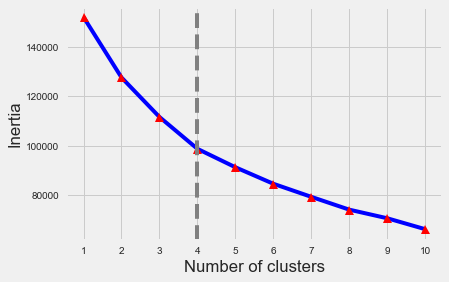

In [25]:
# Elbow Method

#!pip install kneed
# pip install kneed or conda install kneed

kl = KneeLocator(range(1, 11), List, curve = 'convex', direction = 'decreasing')
kl.elbow
# show plot
plt.style.use('fivethirtyeight')
plt.plot(range(1, 11), List, marker = '^', c='b',  ms = 9, mfc = 'r')
plt.xticks(range(1, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.axvline(x=kl.elbow, color ='gray', label = 'axvline - full height', ls = '--')
plt.show() 

## Model Evaluation

In [26]:
# Silhouette Coefficient

silhouette_coefficients = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmean_set )
    kmeans.fit(scaled_df)
    score = silhouette_score(scaled_df, kmeans.labels_)
    silhouette_coefficients.append(score)

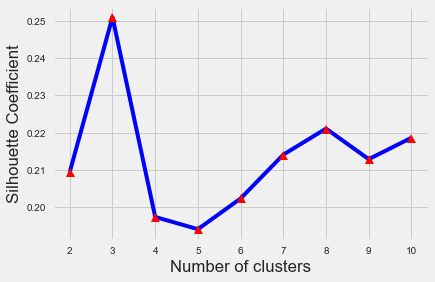

In [27]:
plt.style.use('fivethirtyeight')
plt.plot(range(2, 11), silhouette_coefficients, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2, 11))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.show() 

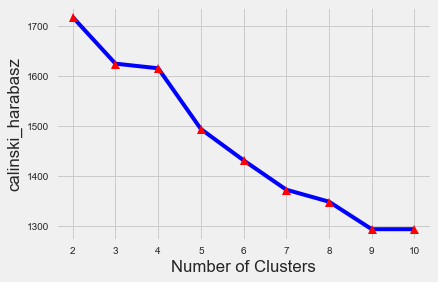

In [28]:
# Calinski_Harabasz Coefficient

calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(scaled_df)
    
    metrics.calinski_harabasz_score(scaled_df, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_df, kmeans.labels_))

plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

### So based on the plots above we conclude that  3 clusters are the best for k-mean modeling

## Apply the k-means

In [29]:
kmeans = KMeans(n_clusters=3, **kmean_set )
kmeans.fit(scaled_df)
labels = kmeans.labels_

In [30]:
# cluster centers (normalized centers, here ther are negative values)
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.367158         -0.176579 -0.231956        -0.203001   
1  0.325590          0.440260  1.541483         1.286613   
2  1.155041          0.338627 -0.291533        -0.207396   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.178344    -0.318036           -0.059695   
1               1.304225    -0.250570            1.144206   
2              -0.315147     1.407693           -0.646507   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.230881                        -0.047403   
1                   1.556730                         0.966006   
2                  -0.307296                        -0.557269   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.336421        -0.303590     -0.242491    -0.334239   
1              -0.354457        -0.250444      1.694916     0.891981   
2               1.557417         1.352354     -0.368548     0.596145   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.285326        -0.135019         0.008664 -0.026891  
1  0.851455         0.176065         0.492713  0.302544  
2  0.440091         0.381687        -0.409819 -0.128474

In [31]:
# real cluster centers (now ther are no negative values)
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0   799.933238          0.835539   508.138125       255.630387   
1  2240.288408          0.981608  4276.195147      2728.453570   
2  3964.872737          0.957541   381.553323       248.335147   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             252.828378   325.182616            0.466434   
1            1548.231773   462.799121            0.949657   
2             133.295422  3845.308116            0.230898   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.133613                         0.345616   
1                   0.666954                         0.748416   
2                   0.110815                         0.142959   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.067799         1.199935      8.682783  3277.323356   
1               0.064193         1.556373     56.846405  7728.799020   
2               0.446433        12.306059      5.549032  6654.843564   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0   910.247196       529.463877         0.156301  11.481869  
1  4169.810658      1255.075437         0.297894  11.922386  
2  2990.279448      1734.693067         0.033887  11.346034

In [32]:
# We add cluster column to dataframe
df_cluster_with_kmean = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_kmean

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8942    28.493517           1.000000     291.12              0.00   
8943    19.183215           1.000000     300.00              0.00   
8944    23.398673           0.833333     144.40              0.00   
8945    13.457564           0.833333       0.00              0.00   
8946   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8942                  291.12      0.000000             1.000000   
8943                  300.00      0.000000             1.000000   
8944                  144.40      0.000000             0.833333   
8945                    0.00     36.558778             0.000000   
8946                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.833333   
8944                    0.000000                          0.666667   
8945                    0.000000                          0.000000   
8946                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8942                0.000000                 0              6        1000.0   
8943                0.000000                 0              6        1000.0   
8944                0.000000                 0              5        1000.0   
8945                0.166667                 2              0         500.0   
8946                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        312.255623          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8942   325.594462         48.886365          0.500000       6        0  
89

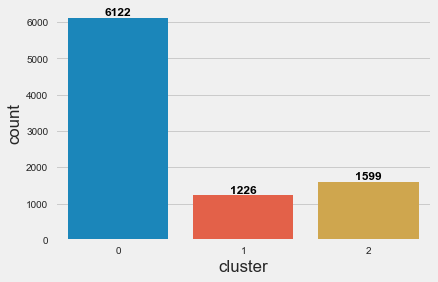

In [33]:
# let us have a look at the group distribution of clustring 

#sns.countplot(x=df_cluster_with_kmean.cluster)
ax = sns.countplot(x=df_cluster_with_kmean.cluster)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

###  most of people are grouped in cluster 0

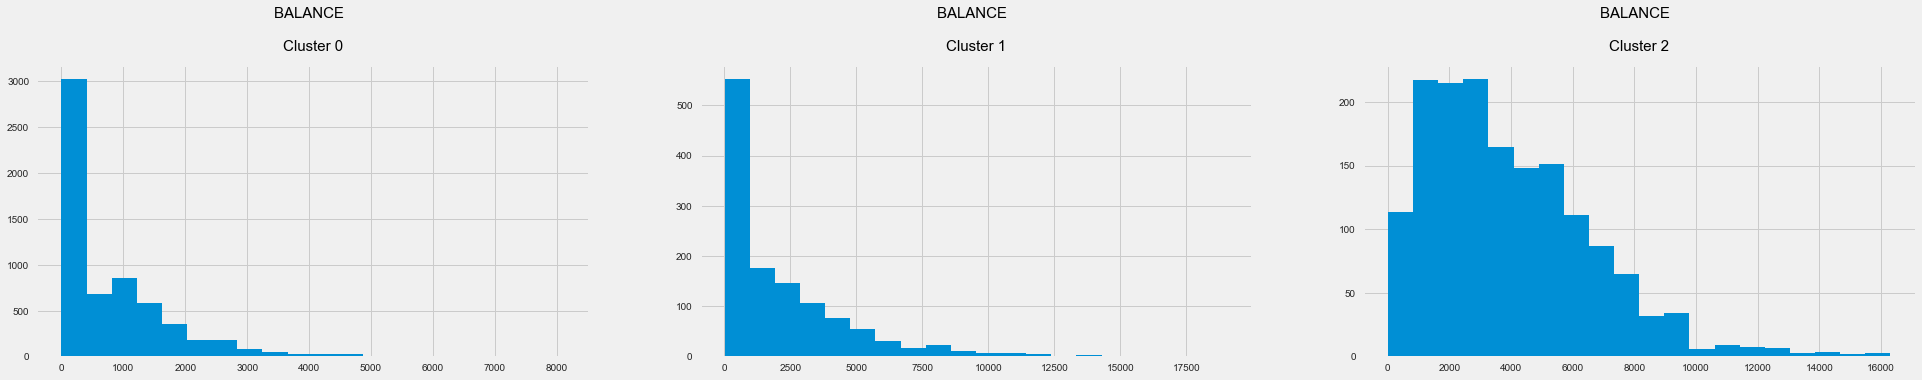

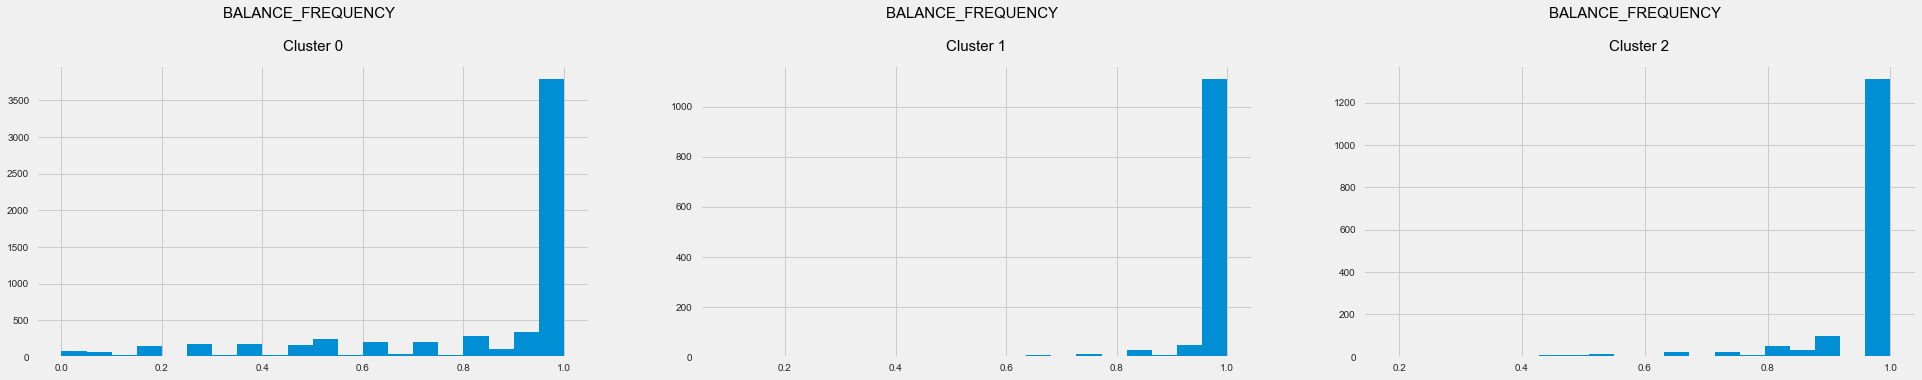

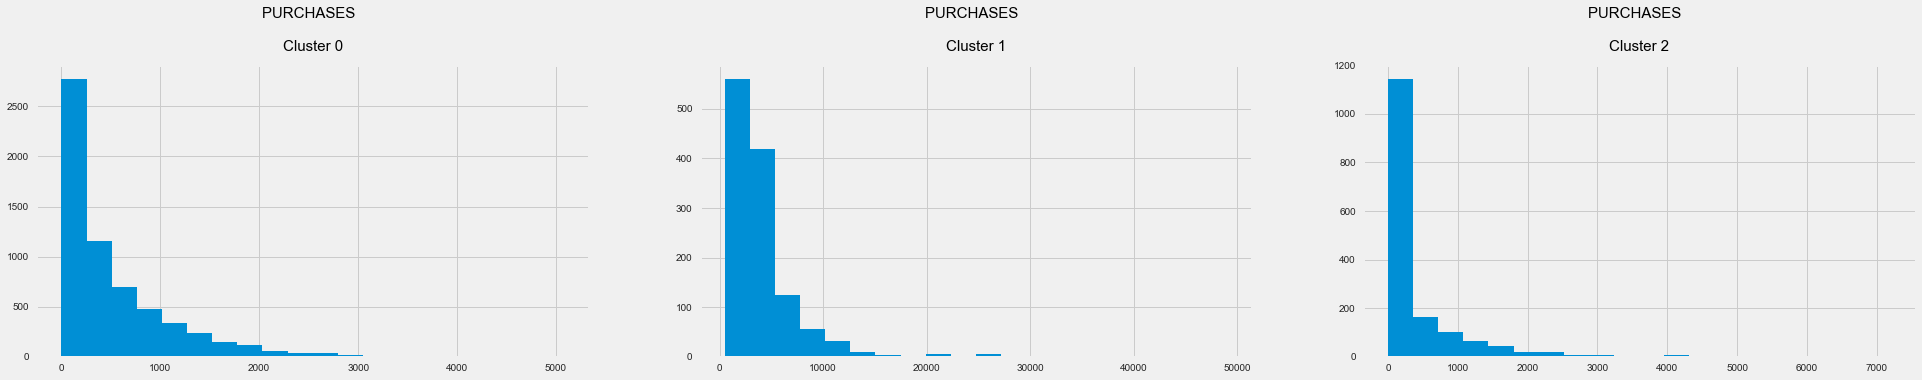

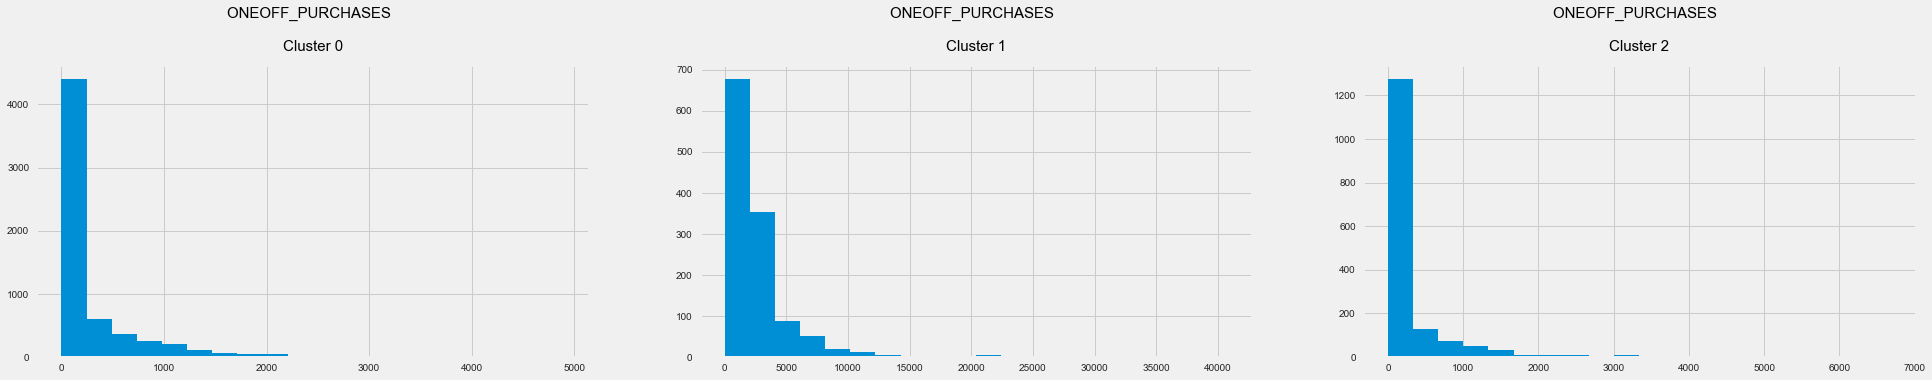

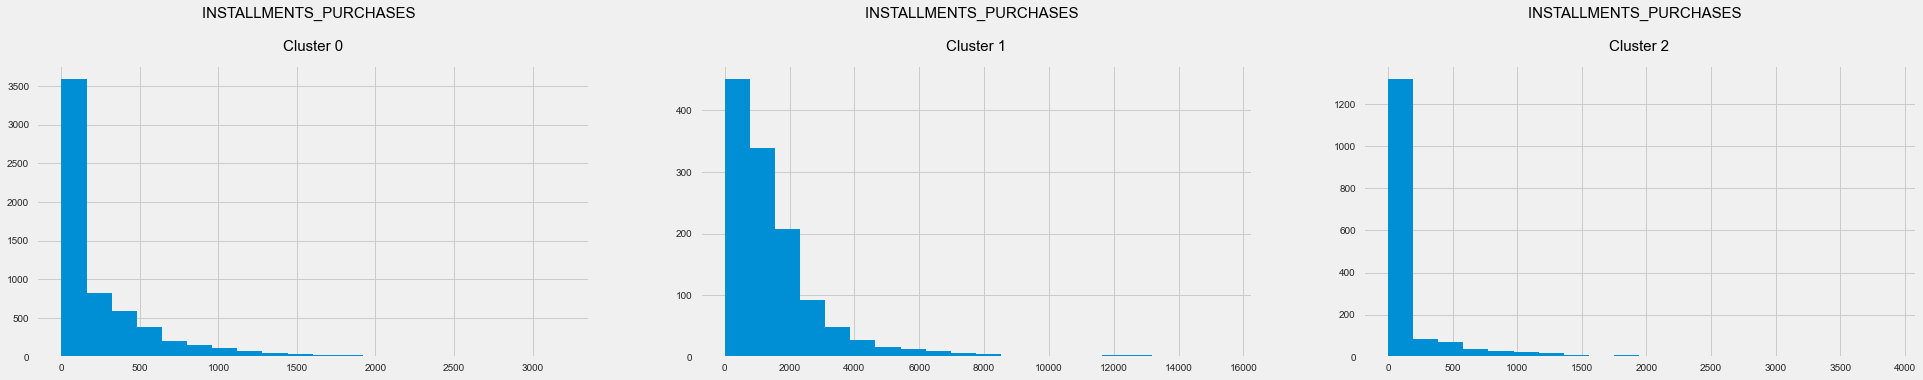

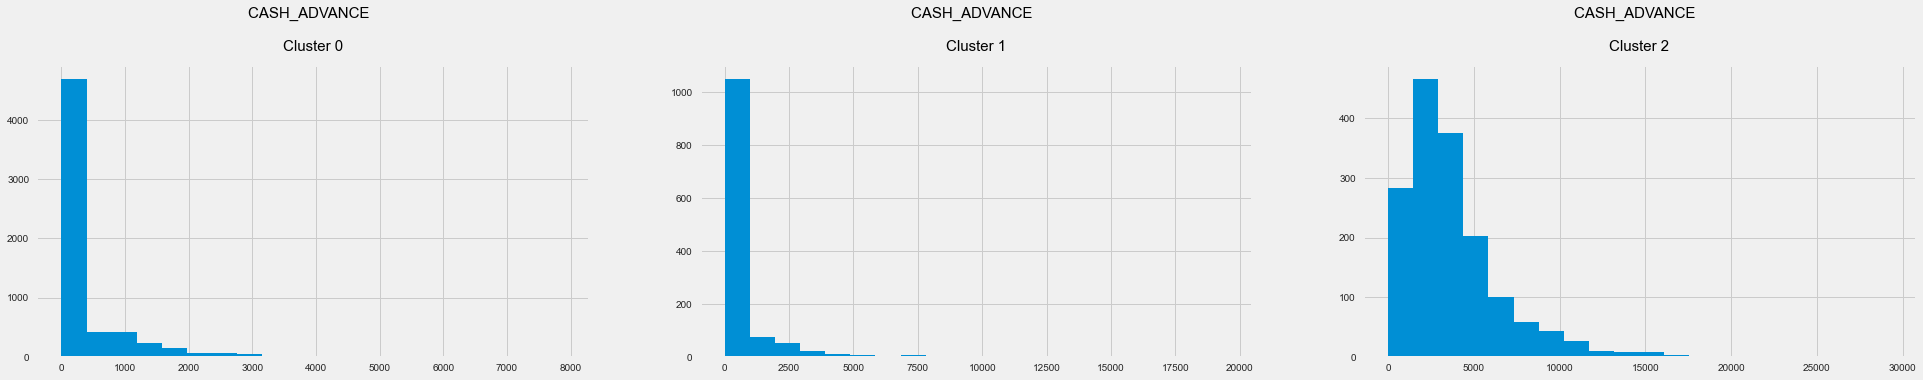

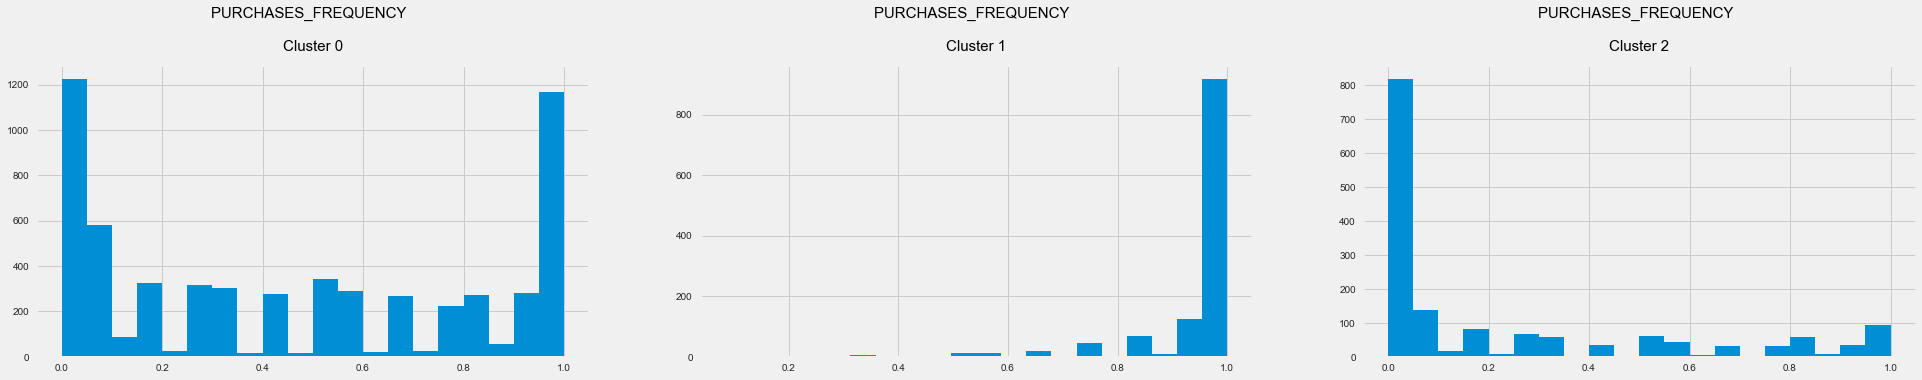

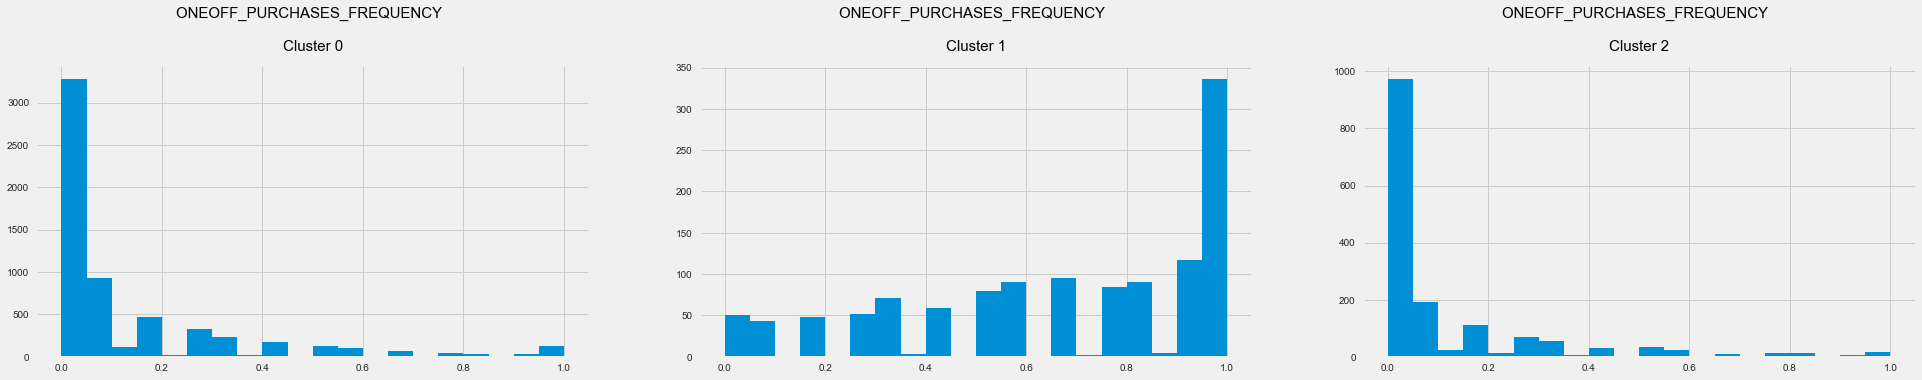

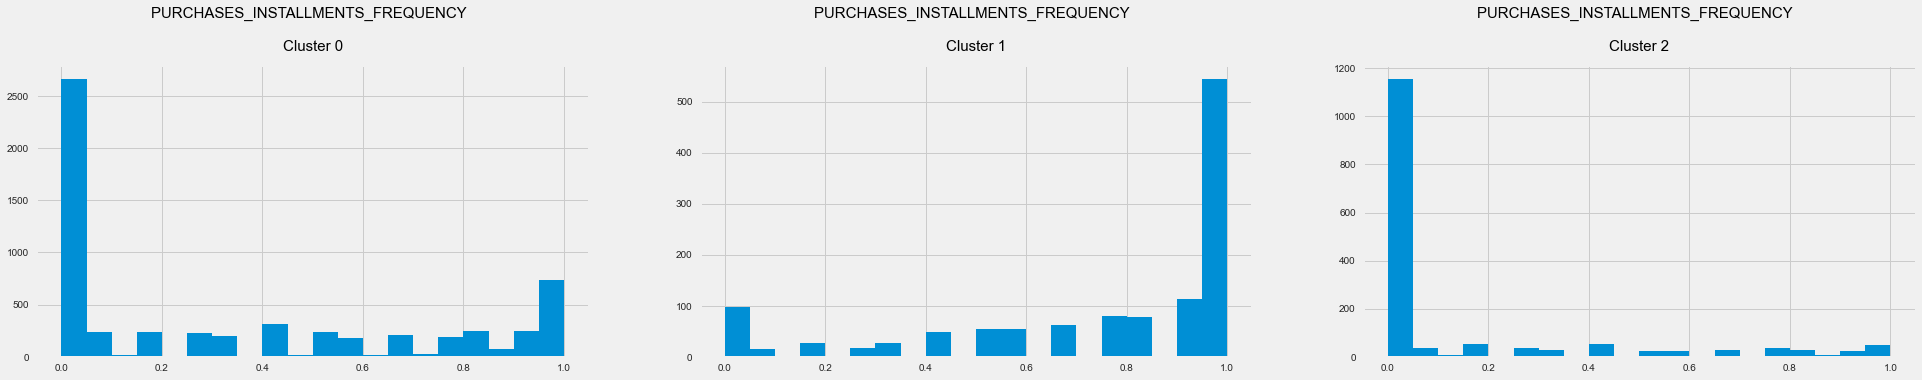

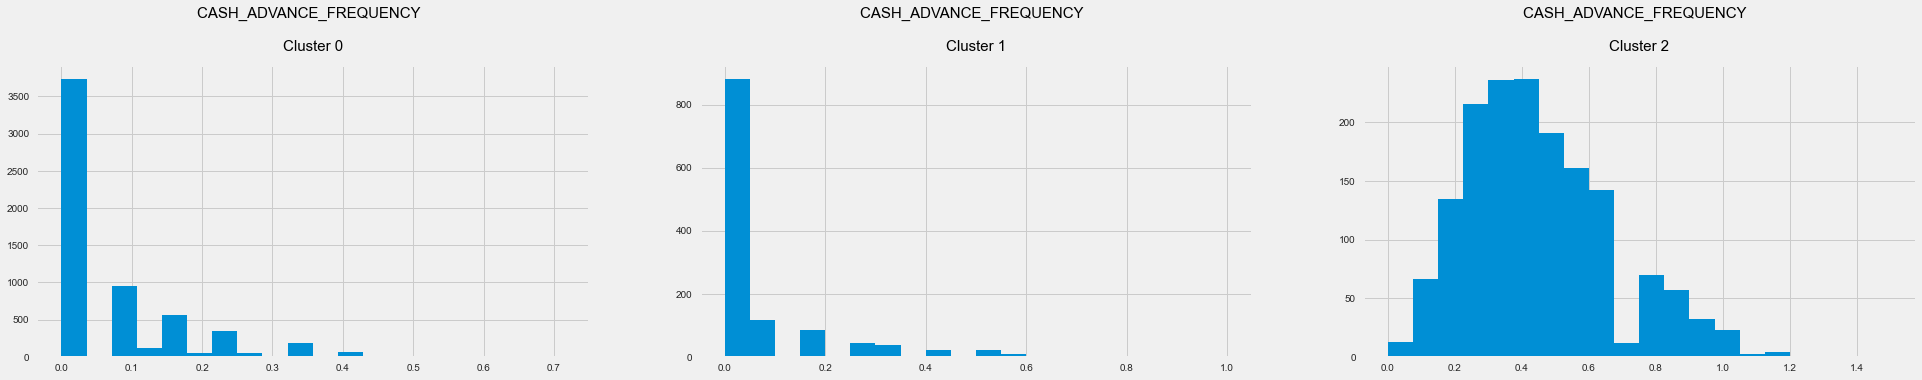

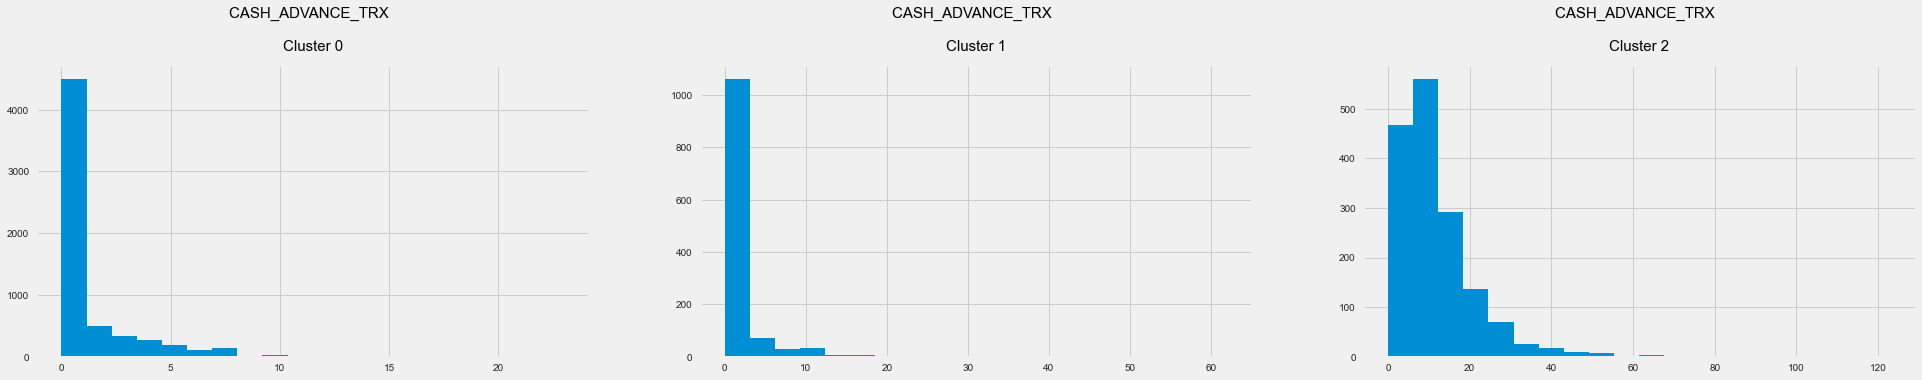

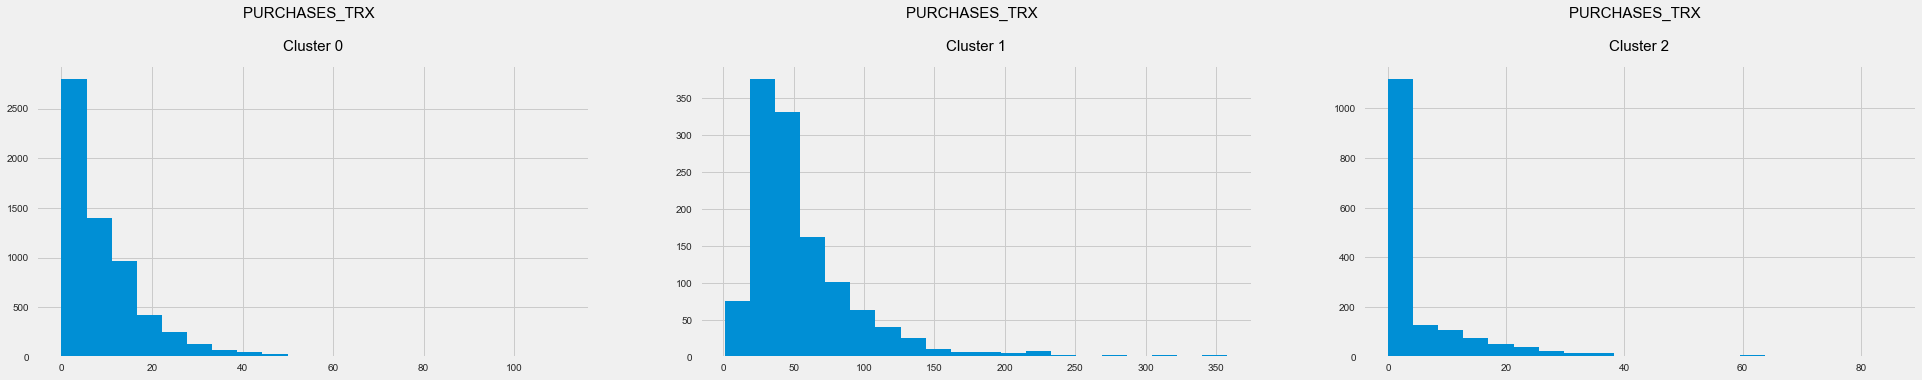

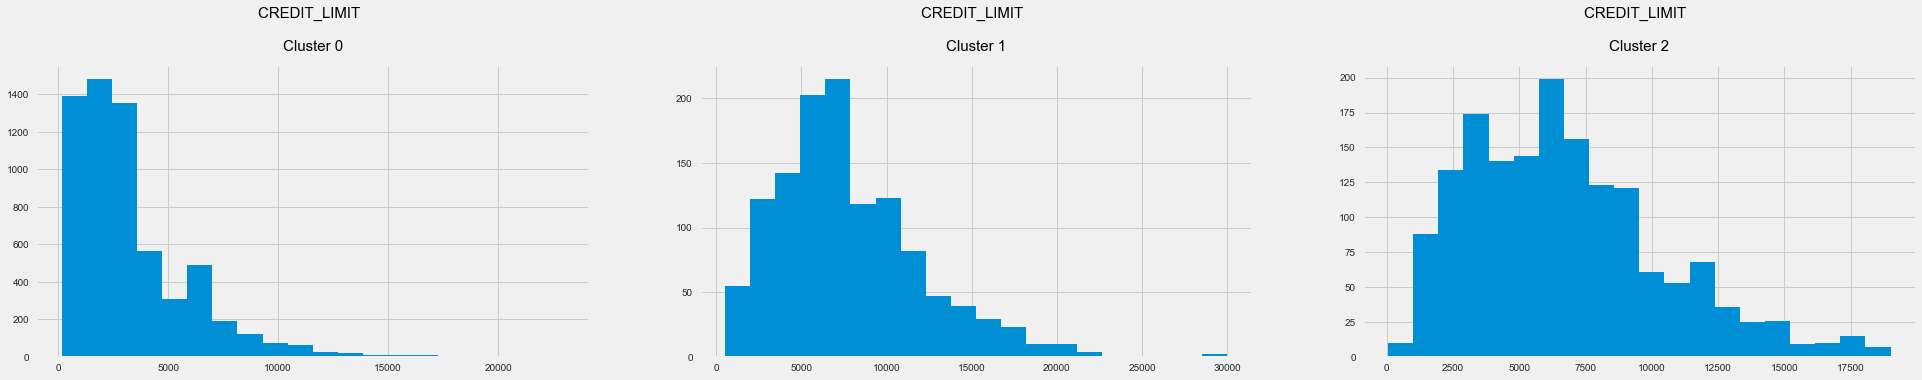

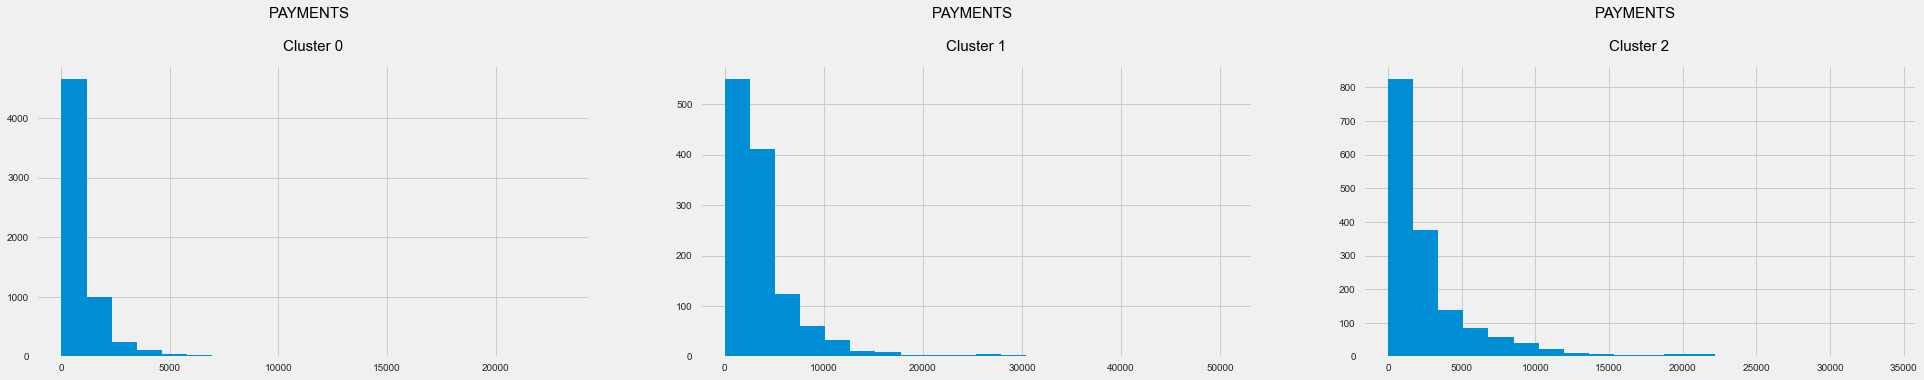

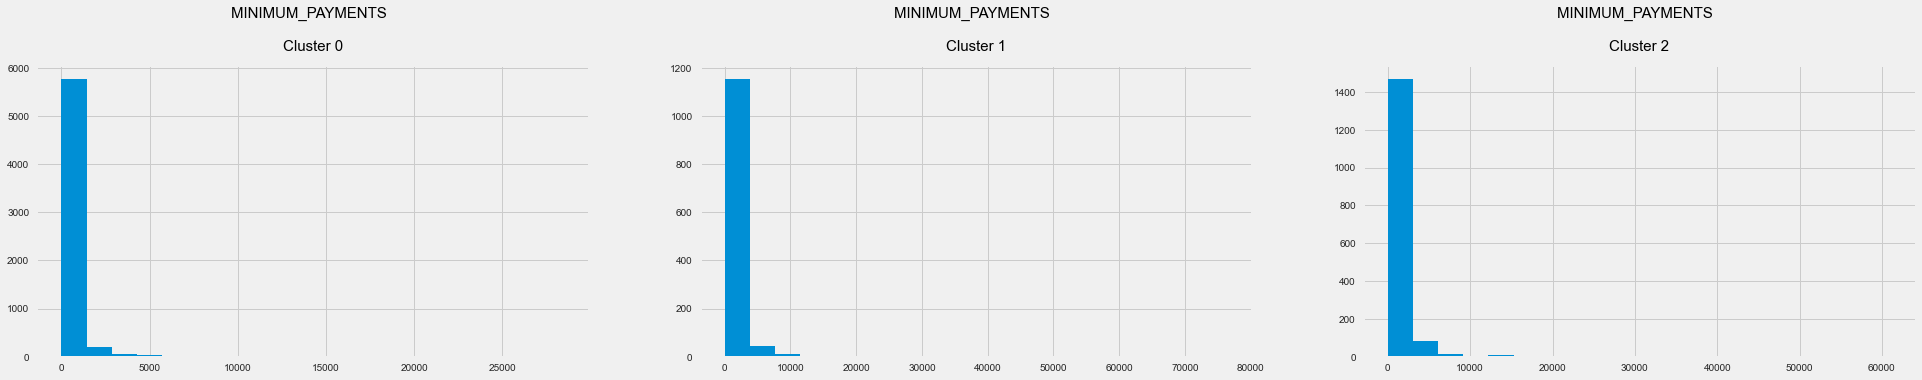

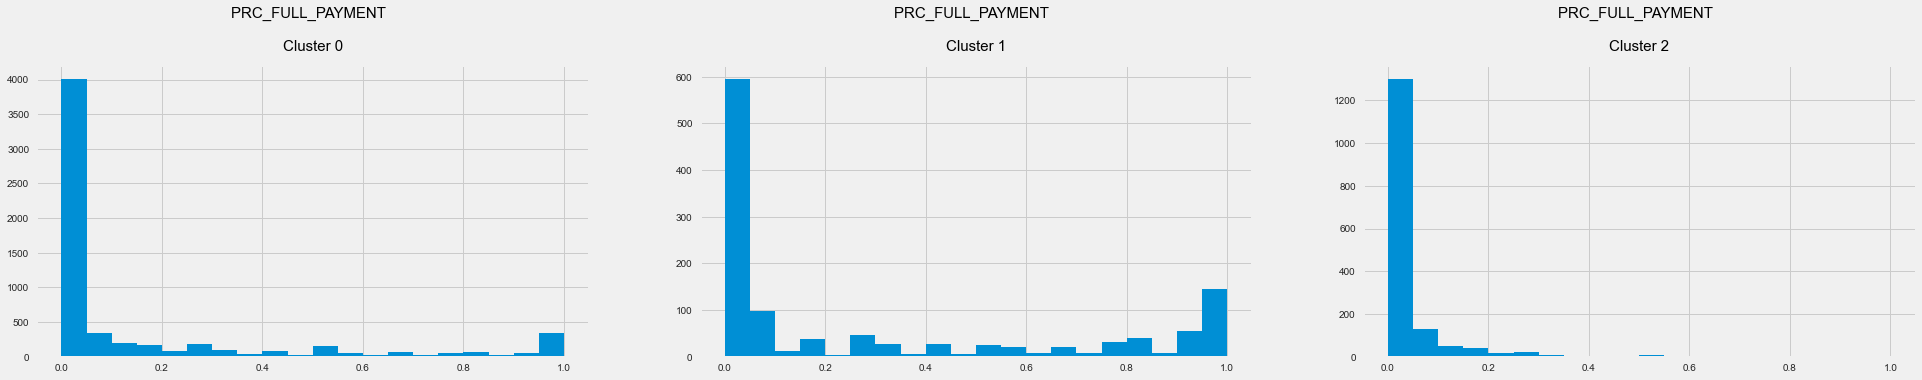

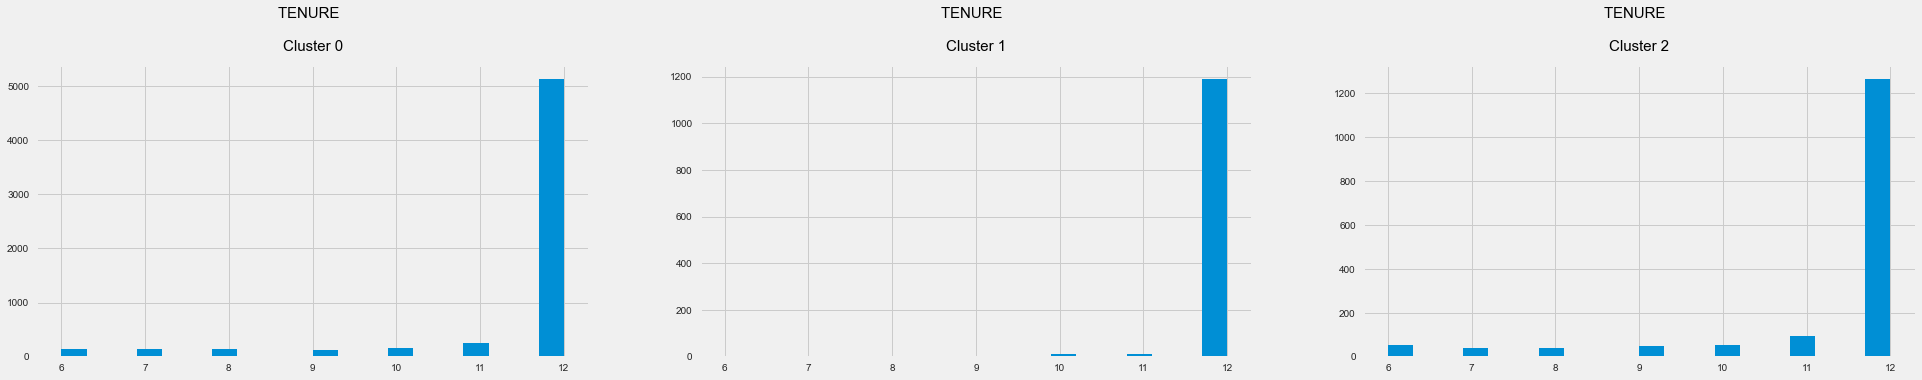

In [34]:
# Plot the histogram of various clusters
for i in df.columns:
    plt.figure(figsize=(30,5))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = df_cluster_with_kmean[df_cluster_with_kmean['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}  \n\nCluster {}'.format(i,j), color='black', fontsize = 15, y=1.03)
        
plt.show()

#### - Cluster0: People with low to average credit limit who make all type of purchases.
#### - Cluster1: Less money spenders with average to high credit limits who purchases mostly in installments.
#### - Cluster2: People with high credit limit who take more cash in advance.

# Feature importance

In [35]:
#split dataset in features and target variable
X = df_cluster_with_kmean. drop('cluster', axis =1)
y = df_cluster_with_kmean['cluster']
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth = 3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

CASH_ADVANCE                        0.411439
PURCHASES                           0.369025
CASH_ADVANCE_FREQUENCY              0.120960
PURCHASES_TRX                       0.074762
BALANCE                             0.023814
CASH_ADVANCE_TRX                    0.000000
PRC_FULL_PAYMENT                    0.000000
MINIMUM_PAYMENTS                    0.000000
PAYMENTS                            0.000000
CREDIT_LIMIT                        0.000000
PURCHASES_INSTALLMENTS_FREQUENCY    0.000000
BALANCE_FREQUENCY                   0.000000
ONEOFF_PURCHASES_FREQUENCY          0.000000
PURCHASES_FREQUENCY                 0.000000
INSTALLMENTS_PURCHASES              0.000000
ONEOFF_PURCHASES                    0.000000
TENURE                              0.000000
dtype: float64

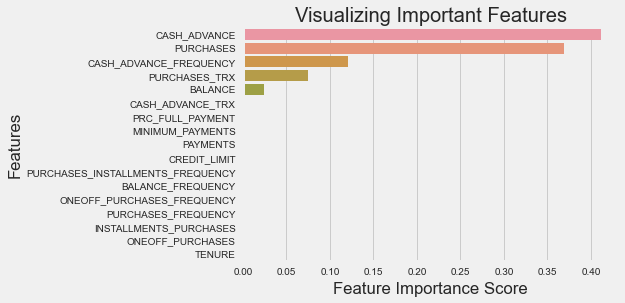

In [36]:
# Creating a seaborn bar plot
sns.barplot(x=feature_scores, y=feature_scores.index)

# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

# Add title to the graph
plt.title("Visualizing Important Features")

# Visualize the graph
plt.show()

## visualizing clusters on original data

Text(38.994706935541316, 0.5, 'PURCHASES')

<Figure size 720x432 with 0 Axes>

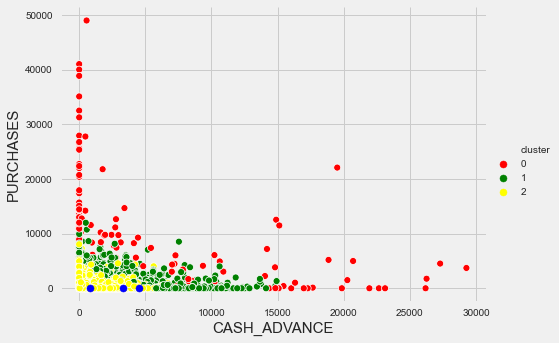

In [37]:
kmeans = KMeans(n_clusters=3,init= "random", random_state = 1).fit(df)
centroids = kmeans.cluster_centers_
plt.figure(figsize=(10,6))

df_kmean = df.copy()
df_kmean['cluster'] = kmeans.labels_
sns.relplot(data = df_kmean ,x='CASH_ADVANCE' , y  ='PURCHASES', hue='cluster', palette=['red','green','yellow'] ,kind='scatter', aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='blue', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

### 3D projection of 3 generated clusters

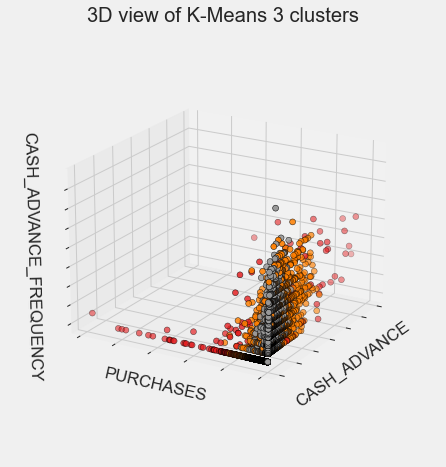

In [38]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .99, 1], elev=20, azim=210)
ax.scatter(df_kmean['CASH_ADVANCE'],
           df_kmean['PURCHASES'],
           df_kmean['CASH_ADVANCE_FREQUENCY'],
           c=df_kmean['cluster'],
           s=35, edgecolor='k', cmap=plt.cm.Set1)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('CASH_ADVANCE')
ax.set_ylabel('PURCHASES')
ax.set_zlabel('CASH_ADVANCE_FREQUENCY')
ax.set_title('3D view of K-Means 3 clusters')
ax.dist = 12

plt.show()

### To plot some selected scaled features 

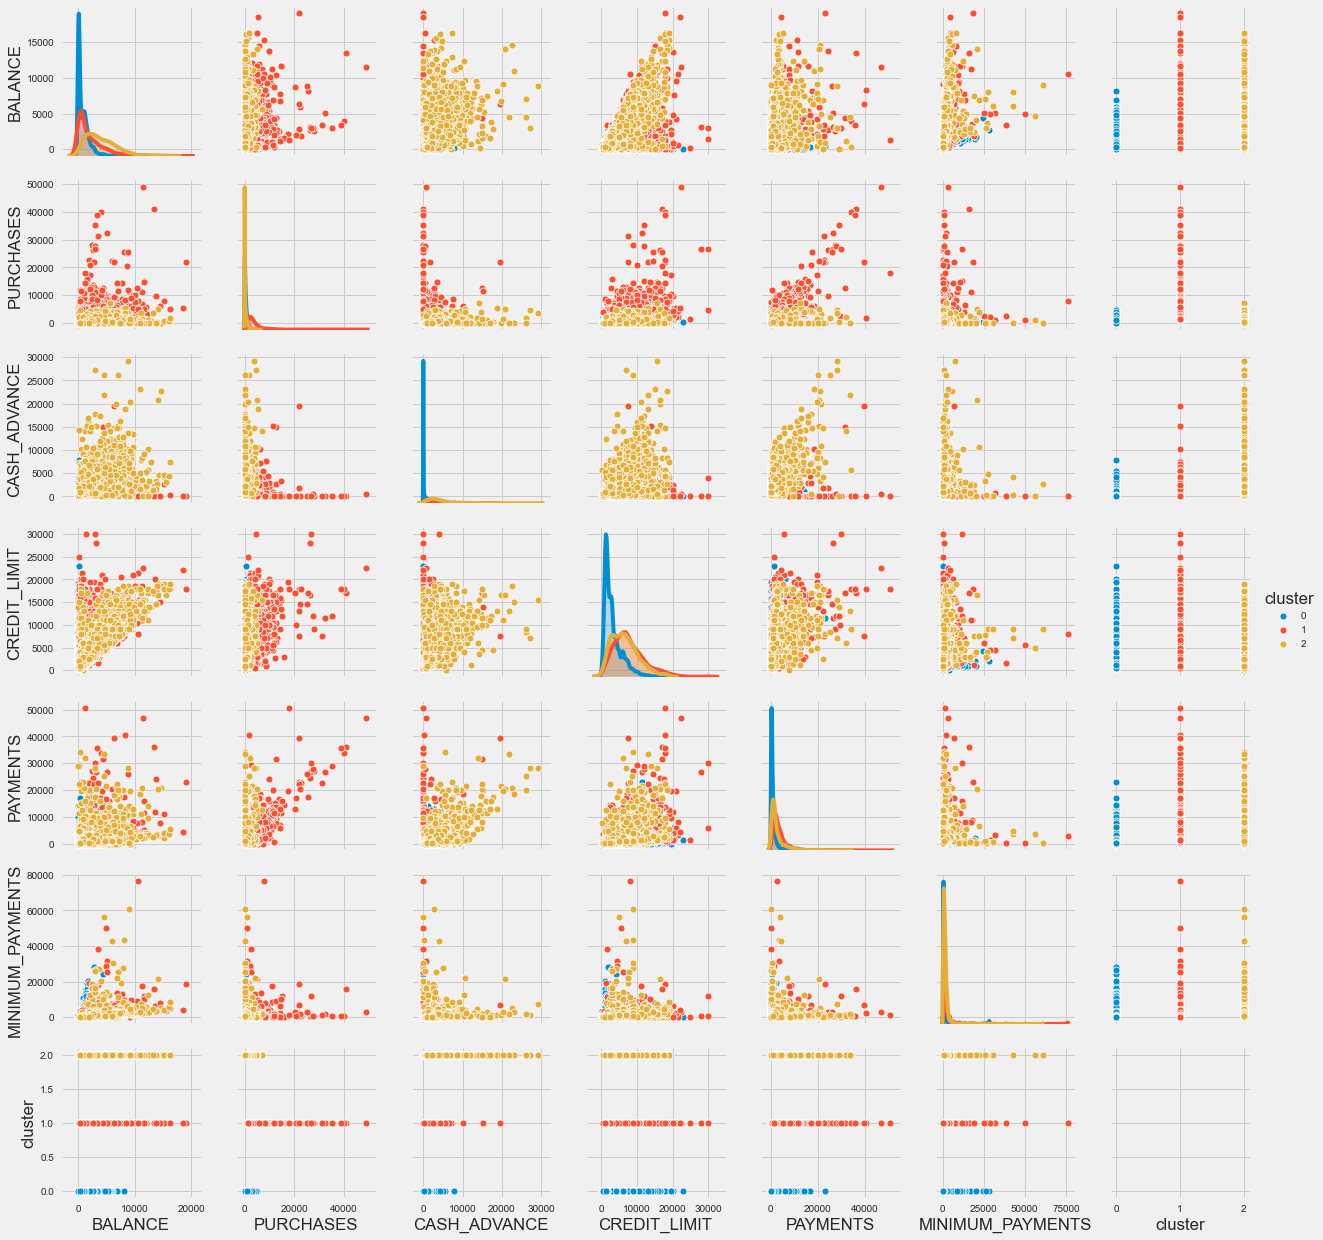

In [39]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_cluster_with_kmean[ best_cols ], hue="cluster")

### To plot original features

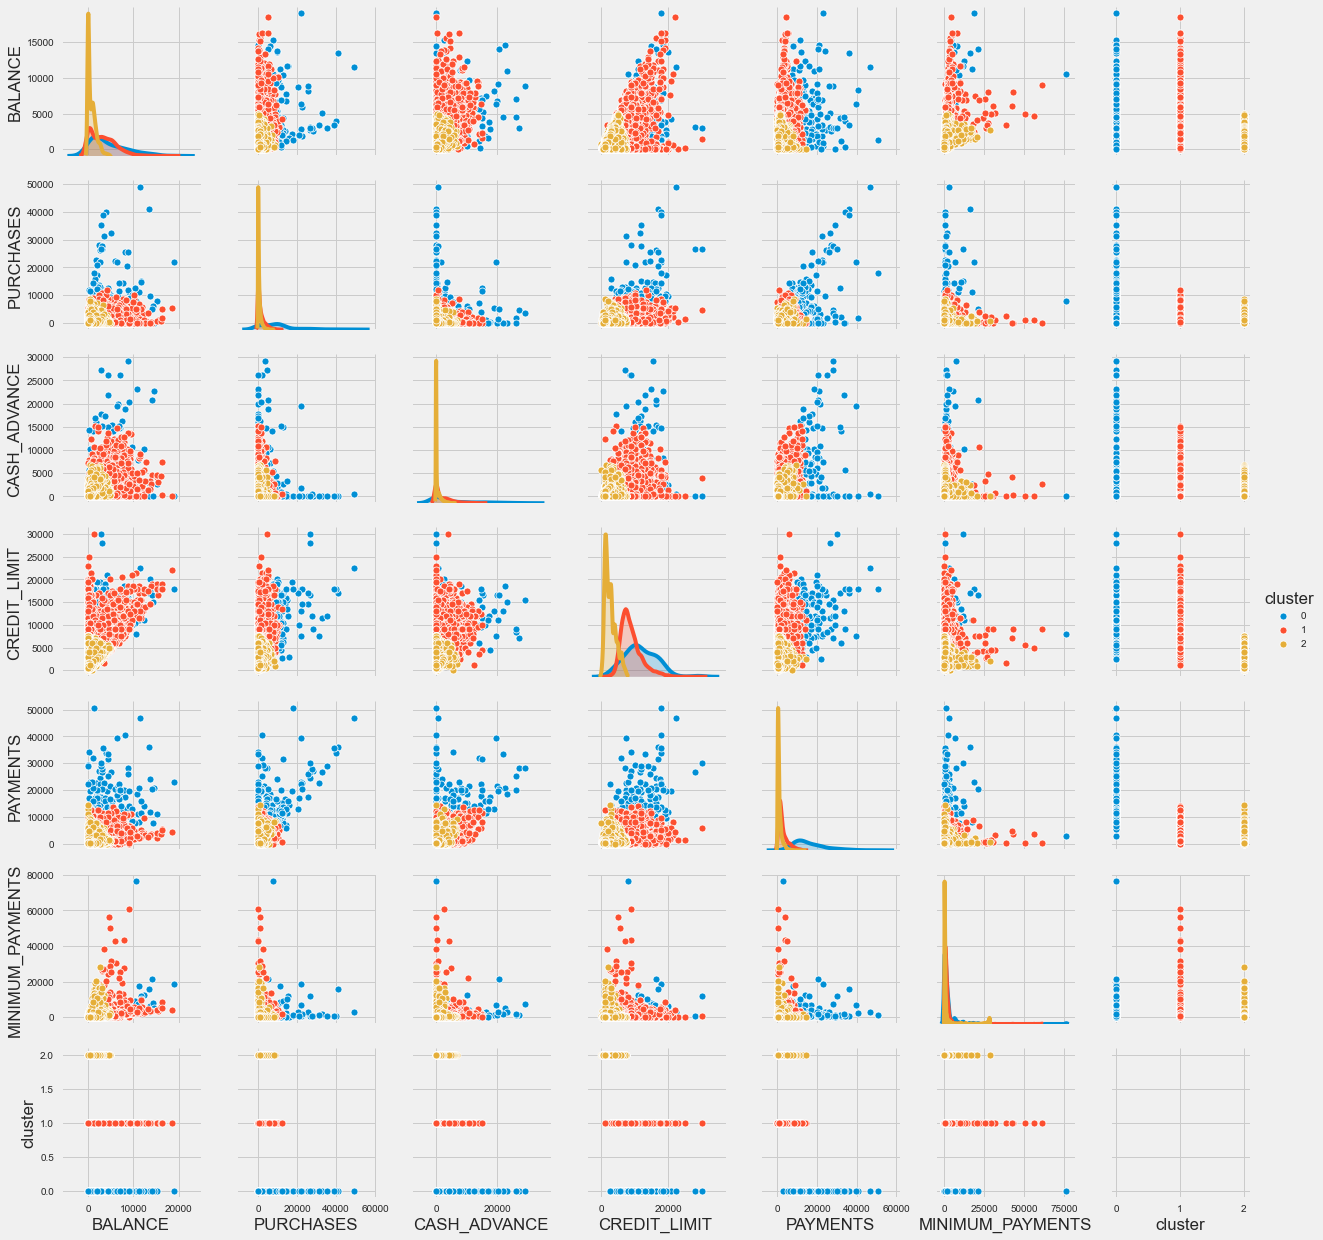

In [40]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT", "PAYMENTS", "MINIMUM_PAYMENTS","cluster"]
sns.pairplot( df_kmean[ best_cols ], hue="cluster")

## Dimensionality Reduction

In [41]:
# PCA

# Obtain the principal components
pca = PCA(n_components = 2)
principal_comp = pca.fit_transform(df_kmean)
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
pca_df.head()

pca1         pca2
0 -4319.779474   915.911584
1  4074.808846 -2390.445099
2  1534.924544 -2023.333525
3  1360.908001 -1416.072485
4 -3736.923514   755.835792

In [42]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns = ['pca1', 'pca2'])
# Concatenate the clusters labels to the dataframe
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster':labels})], axis=1)
pca_df.head()

pca1         pca2  cluster
0 -4319.779474   915.911584        0
1  4074.808846 -2390.445099        2
2  1534.924544 -2023.333525        0
3  1360.908001 -1416.072485        0
4 -3736.923514   755.835792        0

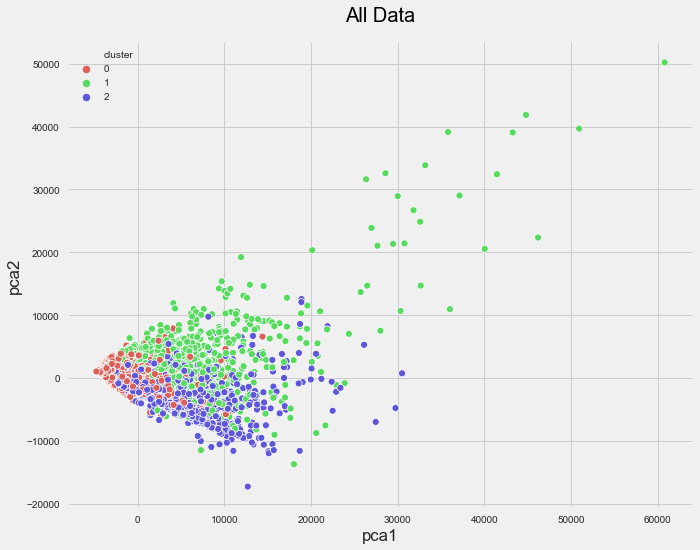

In [43]:
plt.figure(figsize = (10,8))
ax = sns.scatterplot(x='pca1', y='pca2', hue='cluster', 
                     data=pca_df, 
                     palette=sns.color_palette("hls", 3))
plt.title('All Data', fontsize = 20, color='black', y=1.03)
plt.show();

In [44]:
# T-SNE

# Two-dimensional representation of input data
tsne = TSNE(n_components=2, 
            perplexity=50,  
            random_state=42,
            n_iter=300).fit_transform(df_kmean)

In [45]:
# convert tsne to dataframe
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2']) 
df_embed['cluster']= pd.DataFrame({'cluster': labels}) 
df_embed

feature1   feature2  cluster
0     6.389109   9.257667        0
1    -6.368653  -1.384909        2
2    -2.810941  -4.952258        0
3     0.288276  -6.197028        0
4     0.360334  10.262605        0
...        ...        ...      ...
8942  6.738379   7.592093        0
8943  6.784950   7.595016        0
8944  6.566912   9.294675        0
8945  3.885390  10.617787        0
8946  4.844765   3.177205        0

[8947 rows x 3 columns]

[Text(0.5, 1.0, 'All Data')]

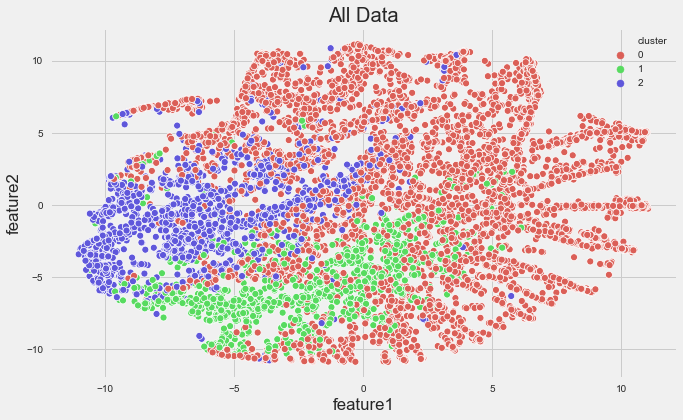

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    hue=df_embed['cluster'],
    palette=sns.color_palette("hls", 3)
).set(title='All Data')

#  2. Gaussian Mixture Model

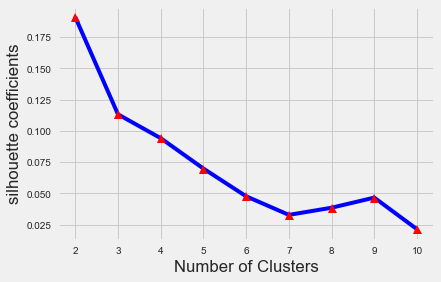

maxs silhouette 0.19098430008899392


In [47]:

score_gmm = []
for k in range(2,11):  #this range is optional
    gmm = GaussianMixture(n_components=k, random_state=1 )   #each gaussian in your mixture is one component 
    gmm.fit(scaled_df)
    score = silhouette_score(scaled_df, gmm.predict(scaled_df), metric='euclidean',random_state=1)
    score_gmm.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), score_gmm, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('maxs silhouette',max(score_gmm ))

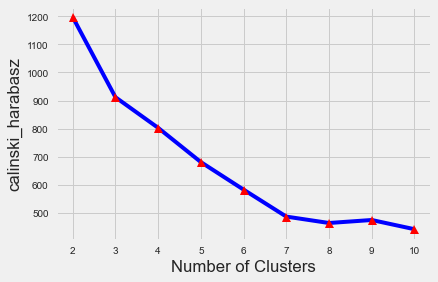

In [48]:

calinski_harabaz = []
for k in range (2,11):
    gmm = GaussianMixture(n_components=k, random_state=1 )
    gmm.fit(scaled_df)
    metrics.calinski_harabasz_score(scaled_df, gmm.predict(scaled_df))
    calinski_harabaz.append(metrics.calinski_harabasz_score(scaled_df, gmm.predict(scaled_df)))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

### Number of clusters = 2

In [49]:
# In gaussian method, we don't have centers, we have mean for each cluster

gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(scaled_df)
labels = gmm.predict(scaled_df)
cluster_means = pd.DataFrame(data = gmm.means_, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0  0.325397          0.337035  0.626210         0.511491   
1 -0.176891         -0.183217 -0.340417        -0.278054   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0               0.551614     0.116638            0.687757   
1              -0.299865    -0.063406           -0.373875   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.797198                         0.477872   
1                  -0.433369                        -0.259778   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.089055        -0.019867      0.707126     0.456964   
1               0.048412         0.010800     -0.384404    -0.248412   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0  0.521138         0.314339         0.160477  0.211352  
1 -0.283298        -0.170879        -0.087238 -0.114894

In [50]:
# view real cordinates means of clusters(in gaussian we can show mean, instead center)
cluster_means = scaler.inverse_transform(cluster_means)
cluster_means = pd.DataFrame(data = cluster_means, columns = [df.columns])
cluster_means

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  2239.886919          0.957164  2331.498325      1441.717717   
1  1195.535389          0.833967   277.687697       131.039634   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             890.633273  1211.827130            0.766447   
1             146.648063   844.574668            0.340328   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.440345                         0.554397   
1                   0.073201                         0.261203   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.117254         3.102812     32.290121  6149.582433   
1               0.144738         3.308491      5.154848  3588.895829   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  3222.671752      1577.601363         0.200709  11.800445  
1   916.061467       445.818663         0.128248  11.364192

In [51]:
#adding cluster column to dataframe
df_cluster_with_gmm = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_gmm

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8942    28.493517           1.000000     291.12              0.00   
8943    19.183215           1.000000     300.00              0.00   
8944    23.398673           0.833333     144.40              0.00   
8945    13.457564           0.833333       0.00              0.00   
8946   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8942                  291.12      0.000000             1.000000   
8943                  300.00      0.000000             1.000000   
8944                  144.40      0.000000             0.833333   
8945                    0.00     36.558778             0.000000   
8946                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.833333   
8944                    0.000000                          0.666667   
8945                    0.000000                          0.000000   
8946                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8942                0.000000                 0              6        1000.0   
8943                0.000000                 0              6        1000.0   
8944                0.000000                 0              5        1000.0   
8945                0.166667                 2              0         500.0   
8946                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        1  
1     4103.032597       1072.340217          0.222222      12        1  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        312.255623          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        1  
...           ...               ...               ...     ...      ...  
8942   325.594462         48.886365          0.500000       6        1  
89

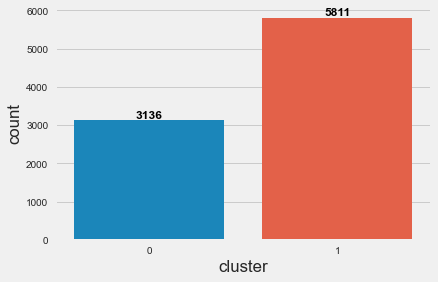

In [52]:
ax = sns.countplot(x=df_cluster_with_gmm.cluster)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

## Data visualization

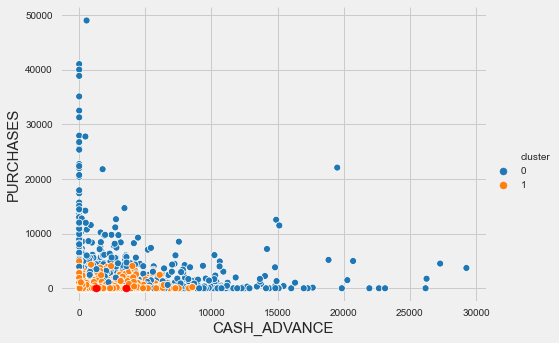

In [53]:
df_gmm = df.copy()
gmm = GaussianMixture(n_components=2, random_state=1).fit(df)
cluster_means = gmm.means_
df_gmm['cluster'] = gmm.predict(df)

sns.relplot(data = df_gmm , x='CASH_ADVANCE' , y ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', aspect = 11.7/8.27)
plt.scatter(cluster_means[:, 0], cluster_means[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)
plt.show()

In [54]:
tsne = TSNE(n_components=2, 
            perplexity=50,  
            random_state=42,
            n_iter=300).fit_transform(df_cluster_with_gmm)

In [55]:
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed['cluster']= pd.DataFrame({'cluster': labels})
df_embed

feature1   feature2  cluster
0     6.409384   9.241794        1
1    -6.373321  -1.367715        1
2    -2.821569  -4.946861        0
3     0.246418  -6.195433        0
4     0.383443  10.261141        1
...        ...        ...      ...
8942  6.755216   7.574924        1
8943  6.802386   7.578798        1
8944  6.587243   9.277946        1
8945  3.910493  10.606565        1
8946  4.852257   3.163747        1

[8947 rows x 3 columns]

[Text(0.5, 1.0, 'All Data')]

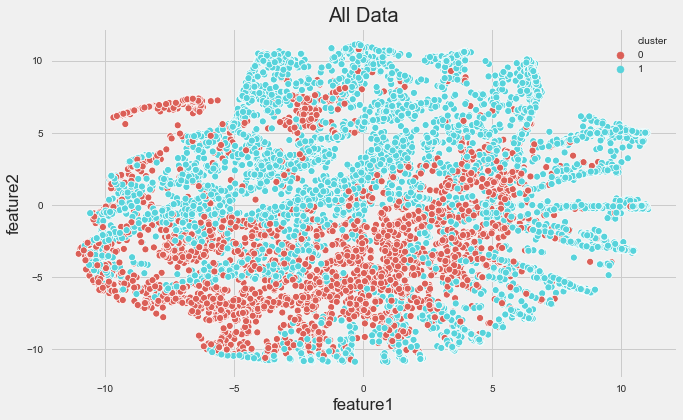

In [56]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    hue=df_embed['cluster'],
    palette=sns.color_palette("hls", 2)
).set(title='All Data')

## 3. Hierarical (Agglomerative Clustering)

#### Between Agglomerative and Divisive clustering, Agglomerative clustering is generally the preferred method. We focus on Agglomerative clustering algorithms because they are the most popular and easiest to implement.

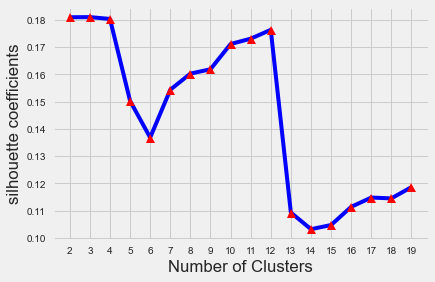

maxs silhouette 0.18100564061759292


In [57]:

sil_Hierarch = []
for k in range(2,20):   #this range is optional
    Hierarch = AgglomerativeClustering(n_clusters = k,linkage='ward') #linkage determines which distance to use between sets of observstion.alghorithm minimize this distance 
    score = silhouette_score(scaled_df, Hierarch.fit_predict(scaled_df),metric='euclidean')
    sil_Hierarch.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,20), sil_Hierarch, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,20))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('maxs silhouette',max(sil_Hierarch))

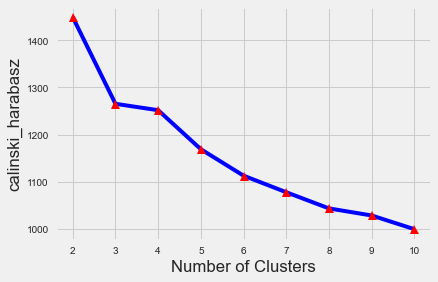

In [58]:

calinski_harabaz = []
for k in range (2,11):
    Hierarch = AgglomerativeClustering(n_clusters = k, linkage='ward')
    score = metrics.calinski_harabasz_score(scaled_df, Hierarch.fit_predict(scaled_df))
    calinski_harabaz.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

### Number of clusters = 2

In [59]:
Hierarch = AgglomerativeClustering(n_clusters =2,linkage='ward')
Hierarch.fit(scaled_df)
score = silhouette_score(scaled_df, Hierarch.fit_predict(scaled_df))
print("silhouette_score",score)

silhouette_score 0.18096014887926604


In [60]:
#adding cluster column to dataframe
labels = Hierarch.labels_
df_cluster_with_Hierarch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_Hierarch

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8942    28.493517           1.000000     291.12              0.00   
8943    19.183215           1.000000     300.00              0.00   
8944    23.398673           0.833333     144.40              0.00   
8945    13.457564           0.833333       0.00              0.00   
8946   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8942                  291.12      0.000000             1.000000   
8943                  300.00      0.000000             1.000000   
8944                  144.40      0.000000             0.833333   
8945                    0.00     36.558778             0.000000   
8946                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.833333   
8944                    0.000000                          0.666667   
8945                    0.000000                          0.000000   
8946                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8942                0.000000                 0              6        1000.0   
8943                0.000000                 0              6        1000.0   
8944                0.000000                 0              5        1000.0   
8945                0.166667                 2              0         500.0   
8946                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3        0.000000        312.255623          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8942   325.594462         48.886365          0.500000       6        0  
89

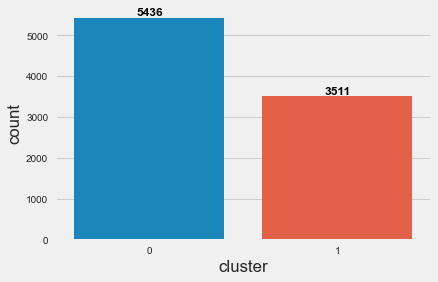

In [61]:
# counting number of clusters
ax = sns.countplot(x=df_cluster_with_Hierarch.cluster)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

Text(38.994706935541316, 0.5, 'PURCHASES')

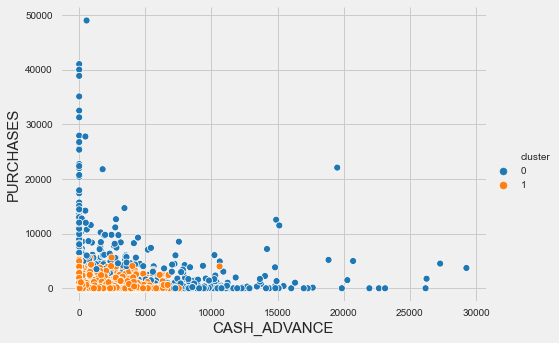

In [62]:
Hierarch = AgglomerativeClustering(n_clusters = 2).fit(df)

df_Hierarch = df.copy()
df_Hierarch['cluster'] = Hierarch.labels_
sns.relplot(data = df_Hierarch ,x='CASH_ADVANCE' , y ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', aspect = 11.7/8.27)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

In [63]:
tsne = TSNE(n_components=2, 
            perplexity=50,  
            random_state=42,
            n_iter=300).fit_transform(df_cluster_with_Hierarch)
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed['cluster']= pd.DataFrame({'cluster': labels})
df_embed

feature1   feature2  cluster
0     6.420465   9.231632        0
1    -6.375621  -1.360663        0
2    -2.823547  -4.953666        1
3     0.230216  -6.198424        0
4     0.394721  10.258865        0
...        ...        ...      ...
8942  6.765285   7.563805        0
8943  6.813107   7.568005        0
8944  6.598951   9.267528        0
8945  3.920928  10.597097        0
8946  4.854574   3.155156        0

[8947 rows x 3 columns]

[Text(0.5, 1.0, 'All Data')]

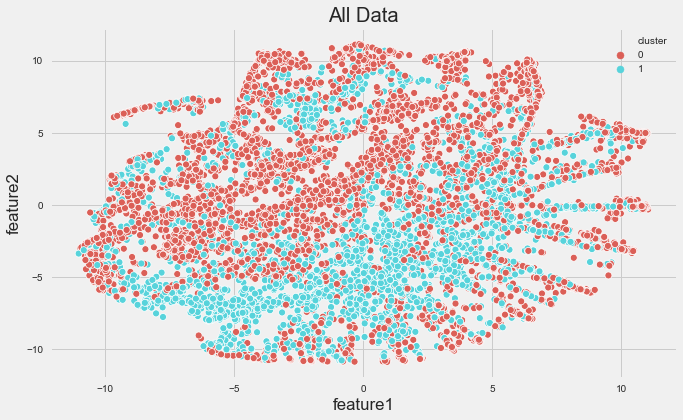

In [64]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    hue=df_embed['cluster'],
    palette=sns.color_palette("hls", 2)
).set(title='All Data')

## 4. Mini Batch KMeans

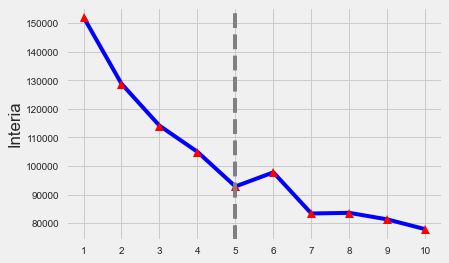

In [65]:
List = []
for k in range(1,11):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =1, batch_size=50) 
    minibatch.fit(scaled_df)
    List.append(minibatch.inertia_)

kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List, marker = '^', c='b',  ms = 9, mfc = 'r')
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='grey', label='axvline - full height', ls='--')
plt.show()  
  

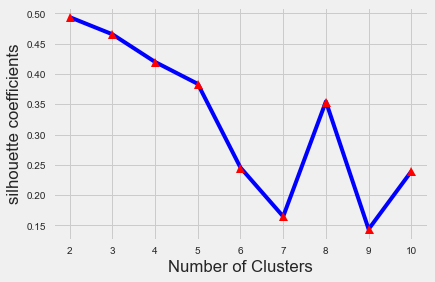

maxs silhouette 0.49390254197131717


In [66]:

silhouette_coefficients = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =1, batch_size=50) 
    minibatch.fit(X)
    score = silhouette_score(X, minibatch.predict(X))
    silhouette_coefficients.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('maxs silhouette',max(silhouette_coefficients))

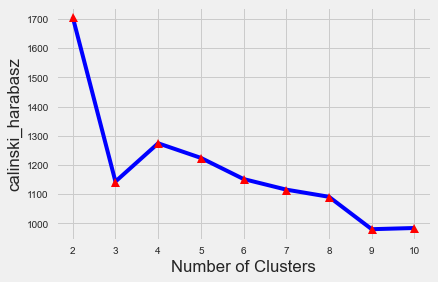

In [67]:

calinski_harabaz = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, init='random' , random_state =1, batch_size=50)
    minibatch.fit(scaled_df)
    score = metrics.calinski_harabasz_score(scaled_df, minibatch.labels_)
    calinski_harabaz.append(score)
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz, marker = '^', c = 'b', ms = 9, mfc = 'r')
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

### Number of clusters = 3

In [68]:
# view cluster centers (scaled centers)

minibatch = MiniBatchKMeans(n_clusters=3, random_state =1, batch_size=50)
minibatch.fit(scaled_df)
labels = minibatch.labels_
cluster_centers = pd.DataFrame(data = minibatch.cluster_centers_, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY PURCHASES ONEOFF_PURCHASES  \
0 -0.188741         -0.167253 -0.305782        -0.235942   
1  0.256009          0.441275  0.937093         0.718902   
2  1.851595          0.409714 -0.094122        -0.092726   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0              -0.295186    -0.094086           -0.363857   
1               0.913588    -0.265185            1.134990   
2              -0.053051     2.587348           -0.341344   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                  -0.333398                        -0.311065   
1                   1.091718                         0.991585   
2                  -0.209601                        -0.237743   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0              -0.041447        -0.091360     -0.358920    -0.288982   
1              -0.376289        -0.292818      1.141203     0.635074   
2               2.387748         2.605190     -0.120509     1.177024   

   PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT    TENURE  
0 -0.234638        -0.103083        -0.123577 -0.073977  
1  0.413968         0.236269         0.467960  0.286365  
2  1.103745         0.801858        -0.372445 -0.159433

In [69]:
# viewing real centers
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  1170.897114          0.837747   351.277217       200.946963   
1  2095.615910          0.981848  2992.036692      1786.028992   
2  5413.140747          0.974375   800.995497       438.692185   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0             150.737039   781.994528            0.344348   
1            1206.909955   432.987966            0.945957   
2             362.303311  6251.556223            0.353385   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.103027                         0.240818   
1                   0.528216                         0.758583   
2                   0.139963                         0.269961   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.126773         2.623321      5.788388  3441.616016   
1               0.059828         1.272180     43.081203  6796.165414   
2               0.612440        20.708609     11.715232  8763.576159   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  1055.589201       603.953945         0.117618  11.418906  
1  2915.377465      1395.502172         0.290653  11.900752  
2  4893.215981      2714.754352         0.044819  11.304636

In [70]:
#adding cluster column to dataframe
df_cluster_with_minibatch = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_minibatch

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8942    28.493517           1.000000     291.12              0.00   
8943    19.183215           1.000000     300.00              0.00   
8944    23.398673           0.833333     144.40              0.00   
8945    13.457564           0.833333       0.00              0.00   
8946   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8942                  291.12      0.000000             1.000000   
8943                  300.00      0.000000             1.000000   
8944                  144.40      0.000000             0.833333   
8945                    0.00     36.558778             0.000000   
8946                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.833333   
8944                    0.000000                          0.666667   
8945                    0.000000                          0.000000   
8946                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8942                0.000000                 0              6        1000.0   
8943                0.000000                 0              6        1000.0   
8944                0.000000                 0              5        1000.0   
8945                0.166667                 2              0         500.0   
8946                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        1  
3        0.000000        312.255623          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8942   325.594462         48.886365          0.500000       6        0  
89

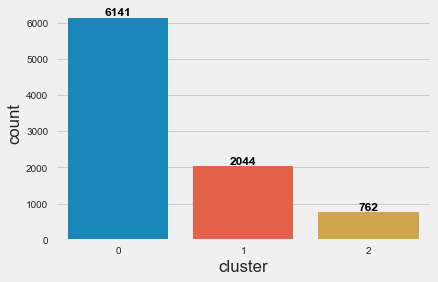

In [71]:
# counting number of clusters
ax = sns.countplot(x=df_cluster_with_minibatch.cluster)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

Text(38.994706935541316, 0.5, 'PURCHASES')

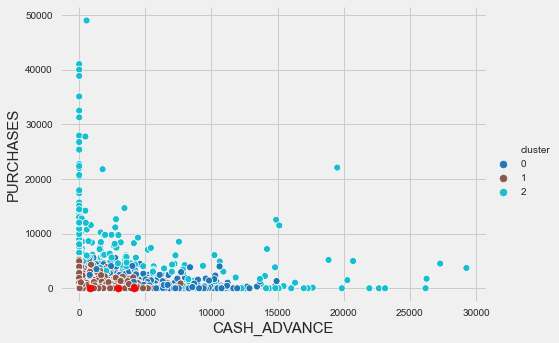

In [72]:
minibatch_df = minibatch.fit(df)
centroids = minibatch_df.cluster_centers_

df_minibatch = df.copy()
df_minibatch['cluster'] = minibatch_df.labels_

sns.relplot(data = df_minibatch ,x='CASH_ADVANCE' , y ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', aspect = 11.7/8.27)
plt.scatter(centroids[:, 0], centroids[:,1], c='red', s=50)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)

[Text(0.5, 1.0, 'All Data')]

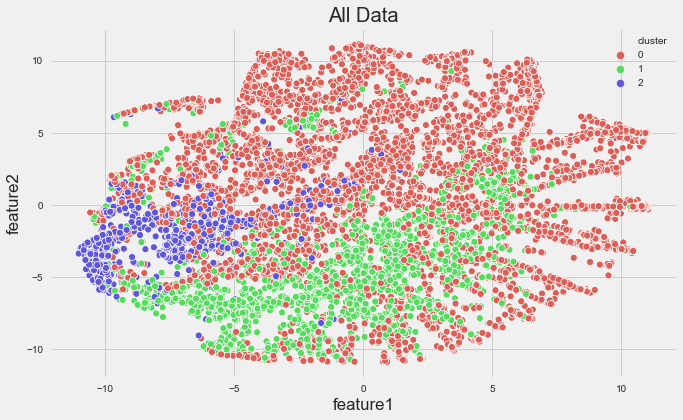

In [73]:
tsne = TSNE(n_components=2, 
            perplexity=50,  
            random_state=42,
            n_iter=300).fit_transform(df_cluster_with_Hierarch)
df_embed = pd.DataFrame(tsne, columns=['feature1', 'feature2'])
df_embed['cluster']= pd.DataFrame({'cluster': labels})

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='feature1', y='feature2',
    data=df_embed,    
    hue=df_embed['cluster'],
    palette=sns.color_palette("hls", 3)
).set(title='All Data')

### 5. AffinityPropagation

### It is required to specify two parameters:
* Preference which is a negative number and controls how many exemplars are used
* Damping factor which prevents numerical oscillations when updating messages


In [74]:
Affinity = AffinityPropagation(affinity = 'euclidean', random_state=5)
Affinity.fit(scaled_df)
labels = Affinity.labels_
np.unique(labels)

array([-1])

In [75]:
Affinity = AffinityPropagation(damping= 0.5)
Affinity.fit(scaled_df)
labels = Affinity.labels_
np.unique(labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [76]:
Affinity = AffinityPropagation(damping= 0.9)
Affinity.fit(scaled_df)
labels = Affinity.labels_
np.unique(labels)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

### High number of clusters shows that this algorithm is not suitable for this data

## DBSCAN

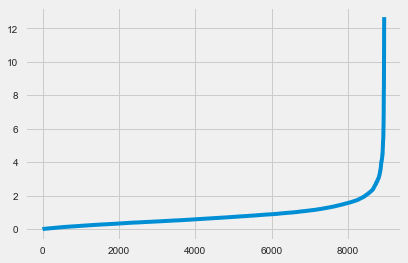

In [77]:
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(scaled_df)
distances, indices = nbrs.kneighbors(scaled_df)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

#### Until around 8000th variable eps is under 2. density is too much in the general data set Here we can also see

### It is difficult arbitrarily to say what values for Epsilon and minimum Samples will work the best. Therefore, I will use a 'for' loop to find ones.

In [78]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,2,0.2):
    for min_sample in range(1,10):
        dbscan = DBSCAN(eps=eps, min_samples= min_sample)
        dbscan.fit(scaled_df)
        sil_score = metrics.silhouette_score(scaled_df, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
        
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [79]:
df_dbscan.sort_values('sil_score', ascending=False).head()

eps  min_samples  sil_score  number_of_clusters
85  1.9            5   0.458543                   2
86  1.9            6   0.453556                   2
87  1.9            7   0.447483                   2
88  1.9            8   0.444152                   2
89  1.9            9   0.440888                   2

In [80]:
siliuette_list_dbscan = []

for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        dbscan.fit(scaled_df)
        sil_score = metrics.silhouette_score(scaled_df, dbscan.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(dbscan.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])

In [81]:
df_dbscan.sort_values('sil_score', ascending=False).tail()

eps  min_samples  sil_score  number_of_clusters
30  1.3            1  -0.398496                1551
7   0.3            9  -0.400440                  14
6   0.3            5  -0.422388                  46
16  0.7            5  -0.455660                  30
11  0.5            5  -0.469988                  38

#### Even though, checking the silhouette score to choose the best DBSCAN metric does not give the best model for our data set. This method seems not a suitable one for our desired model even with a high silhouette score. The reason behind this is that we have a high number of variables in the same cluster itself but distribution of variables does not distributes homogenous in all clusters.

In [82]:
dbscan = DBSCAN(eps=3.5, min_samples=4)
dbscan.fit(scaled_df)
Labels = dbscan.labels_
Labels

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
dbscan_df = pd.DataFrame(scaled_df, columns = df.columns)
dbscan_df['clusters'] = Labels
dbscan_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0 -0.732220          -0.249876  -0.426211         -0.356991   
1  0.788357           0.134026  -0.471111         -0.356991   
2  0.448167           0.517929  -0.107218          0.108762   
3  0.049705          -1.017680   0.234394          0.545997   
4 -0.358606           0.517929  -0.463581         -0.347353   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0               -0.358518     -0.477456            -0.806533   
1               -0.467702      2.681176            -1.221767   
2               -0.467702     -0.477456             1.269632   
3               -0.467702     -0.376569            -1.014151   
4               -0.467702     -0.477456            -1.014151   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   -0.678717                         -0.707283   
1                   -0.678717                         -0.916941   
2                    2.673010                         -0.916941   
3                   -0.399407                         -0.916941   
4                   -0.399407                         -0.916941   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0               -0.675534         -0.482502      -0.511310     -0.961559   
1                0.574907          0.113905      -0.591761      0.691223   
2               -0.675534         -0.482502      -0.109054      0.828955   
3               -0.258722         -0.333400      -0.551535      0.828955   
4               -0.675534         -0.482502      -0.551535     -0.906466   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT    TENURE  clusters  
0 -0.532398         -0.302200         -0.525663  0.360587         0  
1  0.828166          0.097723          0.234022  0.360587         0  
2 -0.385830         -0.093081         -0.525663  0.360587         0  
3 -0.602777         -0.228140         -0.525663  0.360587         0  
4 -0.366206         -0.257064         -0.525663  0.360587         0

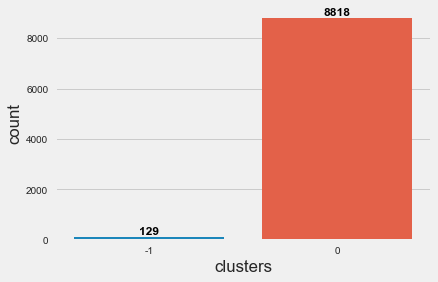

In [84]:
# counting number of clusters
ax = sns.countplot(x=dbscan_df.clusters)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

In [85]:
sil_score = metrics.silhouette_score(scaled_df, dbscan.labels_, metric='euclidean')
sil_score

0.6752808723218444

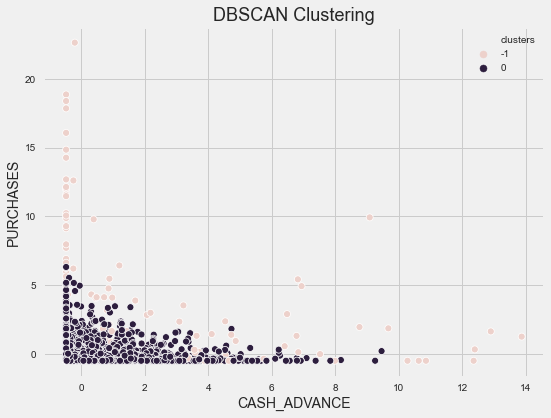

In [86]:
plt.figure(figsize=(8,6))
#plt.scatter(dbscan_df['CASH_ADVANCE'], dbscan_df['PURCHASES'], c=dbscan_df['clusters'])

sns.scatterplot(
    x='CASH_ADVANCE', 
    y='PURCHASES',
    data=dbscan_df,    
    hue=dbscan_df['clusters']
)

plt.title('DBSCAN Clustering',fontsize=18)
plt.xlabel('CASH_ADVANCE',fontsize=14)
plt.ylabel('PURCHASES',fontsize=14)
plt.show()

### DBSCAN created 2 clusters plus outliers cluster (-1). Sizes of clusters vary significantly. There are 129 outliers. 

## 7. MeanShift

In [87]:

meanshift = MeanShift(bandwidth= 12)
meanshift.fit(scaled_df)
cluster_centers = meanshift.cluster_centers_
labels = meanshift.labels_
np.unique(labels)

array([0, 1, 2, 3], dtype=int64)

In [88]:
score = silhouette_score(scaled_df, meanshift.labels_)
score

0.7685397515397101

In [89]:
#adding cluster column to dataframe
df_cluster_with_meanshift = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
df_cluster_with_meanshift

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8942    28.493517           1.000000     291.12              0.00   
8943    19.183215           1.000000     300.00              0.00   
8944    23.398673           0.833333     144.40              0.00   
8945    13.457564           0.833333       0.00              0.00   
8946   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8942                  291.12      0.000000             1.000000   
8943                  300.00      0.000000             1.000000   
8944                  144.40      0.000000             0.833333   
8945                    0.00     36.558778             0.000000   
8946                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8942                    0.000000                          0.833333   
8943                    0.000000                          0.833333   
8944                    0.000000                          0.666667   
8945                    0.000000                          0.000000   
8946                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8942                0.000000                 0              6        1000.0   
8943                0.000000                 0              6        1000.0   
8944                0.000000                 0              5        1000.0   
8945                0.166667                 2              0         500.0   
8946                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  cluster  
0      201.802084        139.509787          0.000000      12        0  
1     4103.032597       1072.340217          0.222222      12        0  
2      622.066742        627.284787          0.000000      12        0  
3        0.000000        312.255623          0.000000      12        0  
4      678.334763        244.791237          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8942   325.594462         48.886365          0.500000       6        0  
89

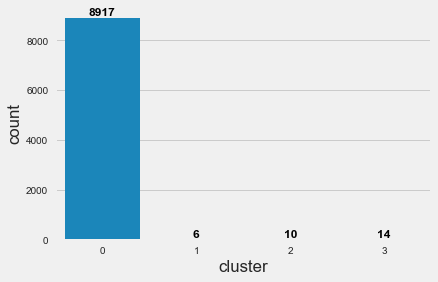

In [90]:
# counting number of clusters
ax = sns.countplot(x=df_cluster_with_meanshift.cluster)
ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
plt.show()

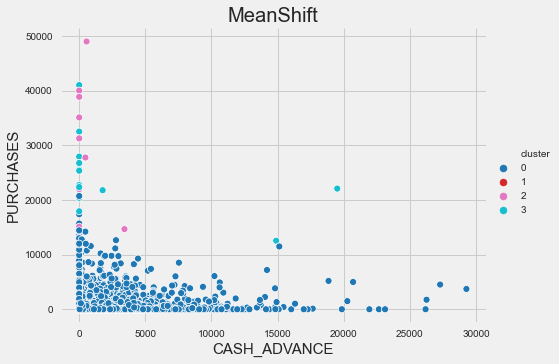

In [91]:
df_MeanShift = df.copy()
df_MeanShift['cluster'] = meanshift.labels_

sns.relplot(data = df_MeanShift ,x='CASH_ADVANCE' , y ='PURCHASES', hue='cluster', palette='tab10' ,kind='scatter', aspect = 11.7/8.27)
plt.xlabel("CASH_ADVANCE",fontsize=15)
plt.ylabel("PURCHASES",fontsize=15)
plt.title('MeanShift')
plt.show()

In [92]:
def meanshift_func(k):
    print('----------------------------------------\n')
    print('Bandwidth:', k)
    meanshift = MeanShift(bandwidth = k)
    meanshift.fit(scaled_df)
    cluster_centers = meanshift.cluster_centers_
    labels = meanshift.labels_
    print('----------------------------------------\n')
    print('labels:', np.unique(labels))
    score = silhouette_score(scaled_df, meanshift.labels_)
    print('----------------------------------------\n')
    print('silhouette_score:', score)
    print('----------------------------------------\n')
    df_cluster_with_meanshift = pd.concat([df, pd.DataFrame({'cluster': labels})], axis = 1)
    # counting number of clusters
    ax = sns.countplot(x=df_cluster_with_meanshift.cluster)
    ax.bar_label(ax.containers[0], fontsize=12, color='black', fontweight='bold')
    plt.show()

----------------------------------------

Bandwidth: 10
----------------------------------------

labels: [0 1 2 3 4 5 6 7]
----------------------------------------

silhouette_score: 0.717365724541238
----------------------------------------



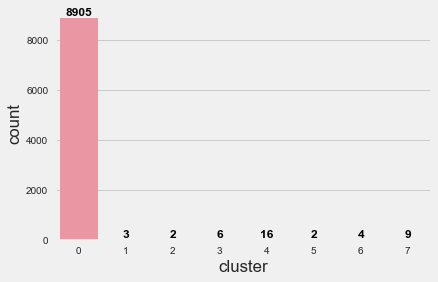

In [93]:
meanshift_func(10)

----------------------------------------

Bandwidth: 6
----------------------------------------

labels: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27]
----------------------------------------

silhouette_score: 0.5026063407515788
----------------------------------------



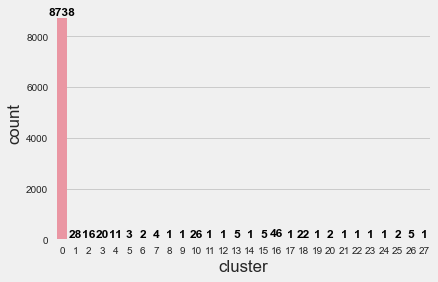

In [94]:
meanshift_func(6)

### As you can see this algorithm places almost all data in the zero class. So this algorithm is not suitable for clustering this data.

## CONCLUSION

#### In this project, I performed different unsupervised clustering algorithm. This can be used in planning better marketing strategies. Some algorithms did not worked properly for this dataset and failed to generate reasonable clusters, it depends on data set and how an algorithm works, for example DBCSAN tries to find clusters based on the density of points. If one of our clusters is less dense than others DBSCAN will produce suboptimal results by not recognising the least dense group as a cluster.